In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("train_master.csv")
test = pd.read_csv("test_master.csv")
transaction_data = pd.read_csv("customer_transaction_data_detailed.csv")
coupon_data = pd.read_csv("coupon_item_mapping_data.csv")

In [3]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,campaign_start_date,campaign_end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,Single,0.0,1,0,5.0
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,0,3.0
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,0,7.0
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,0,3.0


In [4]:
test.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,campaign_start_date,campaign_end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,3,22,869,967,X,16/09/13,18/10/13,36-45,Single,0.0,1,0,5.0
1,4,20,389,1566,Y,07/09/13,16/11/13,26-35,Married,0.0,2,0,9.0
2,5,22,981,510,X,16/09/13,18/10/13,26-35,Married,0.0,2,1,1.0
3,8,25,1069,361,Y,21/10/13,22/11/13,18-25,Single,0.0,1,0,3.0
4,10,17,498,811,Y,29/07/13,30/08/13,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
display(coupon_data.head())
print(coupon_data.nunique())

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


coupon_id      1116
item_id       36289
brand          2555
brand_type        2
category         17
dtype: int64


In [6]:
coupon_data = pd.get_dummies(coupon_data, columns=['brand_type', 'category'])

In [7]:
coupon_data.nunique()

coupon_id                           1116
item_id                            36289
brand                               2555
brand_type_Established                 2
brand_type_Local                       2
category_Bakery                        2
category_Dairy, Juices & Snacks        2
category_Flowers & Plants              2
category_Garden                        2
category_Grocery                       2
category_Meat                          2
category_Miscellaneous                 2
category_Natural Products              2
category_Packaged Meat                 2
category_Pharmaceutical                2
category_Prepared Food                 2
category_Restauarant                   2
category_Salads                        2
category_Seafood                       2
category_Skin & Hair Care              2
category_Travel                        2
category_Vegetables (cut)              2
dtype: int64

In [8]:
coupon_data.columns

Index(['coupon_id', 'item_id', 'brand', 'brand_type_Established', 'brand_type_Local', 'category_Bakery', 'category_Dairy, Juices & Snacks', 'category_Flowers & Plants', 'category_Garden', 'category_Grocery', 'category_Meat', 'category_Miscellaneous', 'category_Natural Products', 'category_Packaged Meat', 'category_Pharmaceutical', 'category_Prepared Food', 'category_Restauarant', 'category_Salads', 'category_Seafood', 'category_Skin & Hair Care', 'category_Travel', 'category_Vegetables (cut)'], dtype='object')

# Insights that Need to be estracted from Coupon Dataframe
1) How many unique items that coupon can be applied to.<br>
2) How many unique brands that Coupon can be applied to.<br>
3) Can it be applied to established brand, if so what is the ratio in which, it can be applied to estabished brands of all brands.<br>
4) Can it be applied to Local brand, if so what is the ratio in which, it can be applied to local brands of all brands.<br>
5) Whether the below catgories accept this coupon, if so how many product belong to this category accept this and how many
not accept this and what is the ratio. <br>

'category_Bakery', 'category_Dairy, Juices & Snacks', 'category_Flowers & Plants', 'category_Garden', 'category_Grocery', 'category_Meat', 'category_Miscellaneous', 'category_Natural Products', 'category_Packaged Meat', 'category_Pharmaceutical', 'category_Prepared Food', 'category_Restauarant', 'category_Salads', 'category_Seafood', 'category_Skin & Hair Care', 'category_Travel', 'category_Vegetables (cut)'

In [9]:

coupon_agg_func = {'item_id':['nunique'],
                'brand':['nunique',pd.Series.mode],
                'brand_type_Established':['max', 'min','sum','mean'],
                'brand_type_Local':['max', 'min','sum','mean'],
                'category_Bakery':['max', 'min','sum','mean'],
                'category_Dairy, Juices & Snacks':['max', 'min','sum','mean'], 
                'category_Flowers & Plants':['max', 'min','sum','mean'],
                'category_Garden':['max', 'min','sum','mean'],
                'category_Grocery':['max', 'min','sum','mean'],
                'category_Meat':['max', 'min','sum','mean'],
                'category_Miscellaneous':['max', 'min','sum','mean'],
                'category_Natural Products':['max', 'min','sum','mean'],
                'category_Packaged Meat':['max', 'min','sum','mean'],
                'category_Pharmaceutical':['max', 'min','sum','mean'],
                'category_Prepared Food':['max', 'min','sum','mean'],
                'category_Restauarant':['max', 'min','sum','mean'],
                'category_Salads':['max', 'min','sum','mean'],
                'category_Seafood':['max', 'min','sum','mean'],
                'category_Skin & Hair Care':['max', 'min','sum','mean'],
                'category_Travel':['max', 'min','sum','mean'],
                'category_Vegetables (cut)':['max', 'min','sum','mean']
                }
coupon_data = coupon_data.groupby('coupon_id').agg(coupon_agg_func)

In [10]:
coupon_data.columns = ['coupon_level_item_id_nunique',
'coupon_level_brand_nunique',
'coupon_level_brand_mode',
'coupon_level_brand_type_Established_max',
'coupon_level_brand_type_Established_min',
'coupon_level_brand_type_Established_sum',
'coupon_level_brand_type_Established_mean',
'coupon_level_brand_type_Local_max',
'coupon_level_brand_type_Local_min',
'coupon_level_brand_type_Local_sum',
'coupon_level_brand_type_Local_mean',
'coupon_level_category_Bakery_max',
'coupon_level_category_Bakery_min',
'coupon_level_category_Bakery_sum',
'coupon_level_category_Bakery_mean',
'coupon_level_category_Dairy,Juices & Snacks_max',
'coupon_level_category_Dairy,Juices & Snacks_min',
'coupon_level_category_Dairy,Juices & Snacks_sum',
'coupon_level_category_Dairy,Juices & Snacks_mean',
'coupon_level_category_Flowers & Plants_max',
'coupon_level_category_Flowers & Plants_min',
'coupon_level_category_Flowers & Plants_sum',
'coupon_level_category_Flowers & Plants_mean',
'coupon_level_category_Garden_max',
'coupon_level_category_Garden_min',
'coupon_level_category_Garden_sum',
'coupon_level_category_Garden_mean',
'coupon_level_category_Grocery_max',
'coupon_level_category_Grocery_min',
'coupon_level_category_Grocery_sum',
'coupon_level_category_Grocery_mean',
'coupon_level_category_Meat_max',
'coupon_level_category_Meat_min',
'coupon_level_category_Meat_sum',
'coupon_level_category_Meat_mean',
'coupon_level_category_Miscellaneous_max',
'coupon_level_category_Miscellaneous_min',
'coupon_level_category_Miscellaneous_sum',
'coupon_level_category_Miscellaneous_mean',
'coupon_level_category_NaturalProducts_max',
'coupon_level_category_NaturalProducts_min',
'coupon_level_category_NaturalProducts_sum',
'coupon_level_category_NaturalProducts_mean',
'coupon_level_category_PackagedMeat_max',
'coupon_level_category_PackagedMeat_min',
'coupon_level_category_PackagedMeat_sum',
'coupon_level_category_PackagedMeat_mean',
'coupon_level_category_Pharmaceutical_max',
'coupon_level_category_Pharmaceutical_min',
'coupon_level_category_Pharmaceutical_sum',
'coupon_level_category_Pharmaceutical_mean',
'coupon_level_category_PreparedFood_max',
'coupon_level_category_PreparedFood_min',
'coupon_level_category_PreparedFood_sum',
'coupon_level_category_PreparedFood_mean',
'coupon_level_category_Restauarant_max',
'coupon_level_category_Restauarant_min',
'coupon_level_category_Restauarant_sum',
'coupon_level_category_Restauarant_mean',
'coupon_level_category_Salads_max',
'coupon_level_category_Salads_min',
'coupon_level_category_Salads_sum',
'coupon_level_category_Salads_mean',
'coupon_level_category_Seafood_max',
'coupon_level_category_Seafood_min',
'coupon_level_category_Seafood_sum',
'coupon_level_category_Seafood_mean',
'coupon_level_category_Skin&HairCare_max',
'coupon_level_category_Skin&HairCare_min',
'coupon_level_category_Skin&HairCare_sum',
'coupon_level_category_Skin&HairCare_mean',
'coupon_level_category_Travel_max',
'coupon_level_category_Travel_min',
'coupon_level_category_Travel_sum',
'coupon_level_category_Travel_mean',
'coupon_level_category_Vegetablescut_max',
'coupon_level_category_Vegetablescut_min',
'coupon_level_category_Vegetablescut_sum',
'coupon_level_category_Vegetablescut_mean']

In [11]:
coupon_data = coupon_data.reset_index()
coupon_data.head()

,coupon_id,coupon_level_item_id_nunique,coupon_level_brand_nunique,coupon_level_brand_mode,coupon_level_brand_type_Established_max,coupon_level_brand_type_Established_min,coupon_level_brand_type_Established_sum,coupon_level_brand_type_Established_mean,coupon_level_brand_type_Local_max,coupon_level_brand_type_Local_min,coupon_level_brand_type_Local_sum,coupon_level_brand_type_Local_mean,coupon_level_category_Bakery_max,coupon_level_category_Bakery_min,coupon_level_category_Bakery_sum,coupon_level_category_Bakery_mean,"coupon_level_category_Dairy,Juices & Snacks_max","coupon_level_category_Dairy,Juices & Snacks_min","coupon_level_category_Dairy,Juices & Snacks_sum","coupon_level_category_Dairy,Juices & Snacks_mean",coupon_level_category_Flowers & Plants_max,coupon_level_category_Flowers & Plants_min,coupon_level_category_Flowers & Plants_sum,coupon_level_category_Flowers & Plants_mean,coupon_level_category_Garden_max,coupon_level_category_Garden_min,coupon_level_category_Garden_sum,coupon_level_category_Garden_mean,coupon_level_category_Grocery_max,coupon_level_category_Grocery_min,coupon_level_category_Grocery_sum,coupon_level_category_Grocery_mean,coupon_level_category_Meat_max,coupon_level_category_Meat_min,coupon_level_category_Meat_sum,coupon_level_category_Meat_mean,coupon_level_category_Miscellaneous_max,coupon_level_category_Miscellaneous_min,coupon_level_category_Miscellaneous_sum,coupon_level_category_Miscellaneous_mean,coupon_level_category_NaturalProducts_max,coupon_level_category_NaturalProducts_min,coupon_level_category_NaturalProducts_sum,coupon_level_category_NaturalProducts_mean,coupon_level_category_PackagedMeat_max,coupon_level_category_PackagedMeat_min,coupon_level_category_PackagedMeat_sum,coupon_level_category_PackagedMeat_mean,coupon_level_category_Pharmaceutical_max,coupon_level_category_Pharmaceutical_min,coupon_level_category_Pharmaceutical_sum,coupon_level_category_Pharmaceutical_mean,coupon_level_category_PreparedFood_max,coupon_level_category_PreparedFood_min,coupon_level_category_PreparedFood_sum,coupon_level_category_PreparedFood_mean,coupon_level_category_Restauarant_max,coupon_level_category_Restauarant_min,coupon_level_category_Restauarant_sum,coupon_level_category_Restauarant_mean,coupon_level_category_Salads_max,coupon_level_category_Salads_min,coupon_level_category_Salads_sum,coupon_level_category_Salads_mean,coupon_level_category_Seafood_max,coupon_level_category_Seafood_min,coupon_level_category_Seafood_sum,coupon_level_category_Seafood_mean,coupon_level_category_Skin&HairCare_max,coupon_level_category_Skin&HairCare_min,coupon_level_category_Skin&HairCare_sum,coupon_level_category_Skin&HairCare_mean,coupon_level_category_Travel_max,coupon_level_category_Travel_min,coupon_level_category_Travel_sum,coupon_level_category_Travel_mean,coupon_level_category_Vegetablescut_max,coupon_level_category_Vegetablescut_min,coupon_level_category_Vegetablescut_sum,coupon_level_category_Vegetablescut_mean
0,1,39,3,1475,1,1,39.0,1.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,0,9.0,0.230769,0,0,0.0,0.0,0,0,0,0.0,1,0,30.0,0.769231,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
1,2,2,1,2084,1,1,2.0,1.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,1,2.0,1.000000,0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
2,3,17,2,278,1,1,17.0,1.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,1,17.0,1.000000,0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
3,4,24,1,544,1,1,24.0,1.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,1,1,24.0,1.000000,0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
4,5,7,1,5357,1,1,7.0,1.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,

# Transaction data

In [12]:
transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,56,Local,Natural Products
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,524,Established,Grocery
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,1134,Established,Grocery
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,524,Established,Grocery


In [13]:
transaction_data.nunique()

date                 549
customer_id         1582
item_id            74063
quantity            9252
selling_price       4923
other_discount      1418
coupon_discount      232
brand               5528
brand_type             2
category              19
dtype: int64

In [14]:
transaction_data['date'] = pd.to_datetime(transaction_data['date'])

In [15]:
transaction_data['date'].max(), transaction_data['date'].min(), transaction_data['date'].max()- transaction_data['date'].min(), 

(Timestamp('2013-07-03 00:00:00'),
 Timestamp('2012-01-02 00:00:00'),
 Timedelta('548 days 00:00:00'))

**Customer transactional data is available from 2nd Jan 2012 to 3rd July 2013(1.5 Years)**

# Insights that needs to be extracted from this dataframe
1) How long he is a customer.<br>
2) How many times he has visited the Site in the past.<br>
3) Time since he last visted the site.<br>
4) How many unique items he has purchased and what is the total quantity.<br>
5) What is Sum, Maximum, Minimum and average price he has bought.<br>
6) How many times he has applied coupon.<br>
7) Average, sum, maximum and minimum Coupon price.<br>
8) Average, sum, maximum and minimum other discounts.<br>
9) How many unique brands he has bought.<br>
10) How many established brand buys and what is the ratio of estabished brands of all brands.<br>
11) How many Local brand buys and what is the ratio of estabished brands of all brands.<br>
12) How many of the below catgories he has bought, what is the count, ratio.<br>
<br>
    'category_Bakery', 'category_Dairy, Juices & Snacks', 'category_Flowers & Plants', 'category_Garden', 'category_Grocery', 'category_Meat', 'category_Miscellaneous', 'category_Natural Products', 'category_Packaged Meat', 'category_Pharmaceutical', 'category_Prepared Food', 'category_Restauarant', 'category_Salads', 'category_Seafood', 'category_Skin & Hair Care', 'category_Travel', 'category_Vegetables (cut)'<br>

In [16]:
transaction_data = pd.get_dummies(transaction_data,  columns=['brand_type', 'category'])
transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type_Established,brand_type_Local,category_Alcohol,category_Bakery,"category_Dairy, Juices & Snacks",category_Flowers & Plants,category_Fuel,category_Garden,category_Grocery,category_Meat,category_Miscellaneous,category_Natural Products,category_Packaged Meat,category_Pharmaceutical,category_Prepared Food,category_Restauarant,category_Salads,category_Seafood,category_Skin & Hair Care,category_Travel,category_Vegetables (cut)
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,56,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,524,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,1134,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,524,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
transaction_data['Applied_Coupon'] = 0 
transaction_data['Applied_Coupon'][transaction_data['coupon_discount']!=0.0] = 1

In [18]:
transaction_data['quantity'].value_counts()

1        1054059
2         188907
3          33094
4          18745
5           5382
          ...   
25030          1
4552           1
17208          1
8654           1
6147           1
Name: quantity, Length: 9252, dtype: int64

In [19]:
transaction_aggregation_function = {
                'date':['max', 'min'],
                'quantity':['max', 'min', 'mean', 'sum'],
                'Applied_Coupon':['max', 'min', 'mean', 'sum'],
                'selling_price':['mean', 'sum'],
                'other_discount':['mean', 'sum'],
                'coupon_discount':['mean', 'sum'],
                'item_id':['nunique', 'count'],
                'brand':['nunique',pd.Series.mode],
                'brand_type_Established':['max', 'min','sum','mean'],
                'brand_type_Local':['max', 'min','sum','mean'],
                'category_Bakery':['max', 'min','sum','mean'],
                'category_Dairy, Juices & Snacks':['max', 'min','sum','mean'], 
                'category_Flowers & Plants':['max', 'min','sum','mean'],
                'category_Garden':['max', 'min','sum','mean'],
                'category_Grocery':['max', 'min','sum','mean'],
                'category_Meat':['max', 'min','sum','mean'],
                'category_Miscellaneous':['max', 'min','sum','mean'],
                'category_Natural Products':['max', 'min','sum','mean'],
                'category_Packaged Meat':['max', 'min','sum','mean'],
                'category_Pharmaceutical':['max', 'min','sum','mean'],
                'category_Prepared Food':['max', 'min','sum','mean'],
                'category_Restauarant':['max', 'min','sum','mean'],
                'category_Salads':['max', 'min','sum','mean'],
                'category_Seafood':['max', 'min','sum','mean'],
                'category_Skin & Hair Care':['max', 'min','sum','mean'],
                'category_Travel':['max', 'min','sum','mean'],
                'category_Vegetables (cut)':['max', 'min','sum','mean']
                }

In [20]:
transaction_data_new = transaction_data.groupby(['customer_id']).agg(transaction_aggregation_function)

In [21]:
transaction_data_new.columns = ['customer_level_date_max',
'customer_level_date_min',
'customer_level_quantity_max',
'customer_level_quantity_min',
'customer_level_quantity_mean',
'customer_level_quantity_sum',
'customer_level_Applied_Coupon_max',
'customer_level_Applied_Coupon_min',
'customer_level_Applied_Coupon_mean',
'customer_level_Applied_Coupon_sum',
'customer_level_selling_price_mean',
'customer_level_selling_price_sum',
'customer_level_other_discount_mean',
'customer_level_other_discount_sum',
'customer_level_coupon_discount_mean',
'customer_level_coupon_discount_sum',
'customer_level_item_id_nunique',
'customer_level_item_id_count',
'customer_level_brand_nunique',
'customer_level_brand_mode',
'customer_level_brand_type_Established_max',
'customer_level_brand_type_Established_min',
'customer_level_brand_type_Established_sum',
'customer_level_brand_type_Established_mean',
'customer_level_brand_type_Local_max',
'customer_level_brand_type_Local_min',
'customer_level_brand_type_Local_sum',
'customer_level_brand_type_Local_mean',
'customer_level_category_Bakery_max',
'customer_level_category_Bakery_min',
'customer_level_category_Bakery_sum',
'customer_level_category_Bakery_mean',
'customer_level_category_Dairy,Juices&Snacks_max',
'customer_level_category_Dairy,Juices&Snacks_min',
'customer_level_category_Dairy,Juices&Snacks_sum',
'customer_level_category_Dairy,Juices&Snacks_mean',
'customer_level_category_Flowers&Plants_max',
'customer_level_category_Flowers&Plants_min',
'customer_level_category_Flowers&Plants_sum',
'customer_level_category_Flowers&Plants_mean',
'customer_level_category_Garden_max',
'customer_level_category_Garden_min',
'customer_level_category_Garden_sum',
'customer_level_category_Garden_mean',
'customer_level_category_Grocery_max',
'customer_level_category_Grocery_min',
'customer_level_category_Grocery_sum',
'customer_level_category_Grocery_mean',
'customer_level_category_Meat_max',
'customer_level_category_Meat_min',
'customer_level_category_Meat_sum',
'customer_level_category_Meat_mean',
'customer_level_category_Miscellaneous_max',
'customer_level_category_Miscellaneous_min',
'customer_level_category_Miscellaneous_sum',
'customer_level_category_Miscellaneous_mean',
'customer_level_category_NaturalProducts_max',
'customer_level_category_NaturalProducts_min',
'customer_level_category_NaturalProducts_sum',
'customer_level_category_NaturalProducts_mean',
'customer_level_category_PackagedMeat_max',
'customer_level_category_PackagedMeat_min',
'customer_level_category_PackagedMeat_sum',
'customer_level_category_PackagedMeat_mean',
'customer_level_category_Pharmaceutical_max',
'customer_level_category_Pharmaceutical_min',
'customer_level_category_Pharmaceutical_sum',
'customer_level_category_Pharmaceutical_mean',
'customer_level_category_PreparedFood_max',
'customer_level_category_PreparedFood_min',
'customer_level_category_PreparedFood_sum',
'customer_level_category_PreparedFood_mean',
'customer_level_category_Restauarant_max',
'customer_level_category_Restauarant_min',
'customer_level_category_Restauarant_sum',
'customer_level_category_Restauarant_mean',
'customer_level_category_Salads_max',
'customer_level_category_Salads_min',
'customer_level_category_Salads_sum',
'customer_level_category_Salads_mean',
'customer_level_category_Seafood_max',
'customer_level_category_Seafood_min',
'customer_level_category_Seafood_sum',
'customer_level_category_Seafood_mean',
'customer_level_category_Skin&HairCare_max',
'customer_level_category_Skin&HairCare_min',
'customer_level_category_Skin&HairCare_sum',
'customer_level_category_Skin&HairCare_mean',
'customer_level_category_Travel_max',
'customer_level_category_Travel_min',
'customer_level_category_Travel_sum',
'customer_level_category_Travel_mean',
'customer_level_category_Vegetablescut_max',
'customer_level_category_Vegetablescut_min',
'customer_level_category_Vegetablescut_sum',
'customer_level_category_Vegetablescut_mean']

In [22]:
transaction_data_new = transaction_data_new.reset_index()

In [23]:
transaction_data['other_discount'].value_counts()

 0.00       652917
-17.45       34518
-7.12        27045
-35.62       21484
-35.26       20737
             ...  
-583.81          1
-259.31          1
-501.53          1
-2248.33         1
-646.86          1
Name: other_discount, Length: 1418, dtype: int64

In [24]:
transaction_data_new.head()

,customer_id,customer_level_date_max,customer_level_date_min,customer_level_quantity_max,customer_level_quantity_min,customer_level_quantity_mean,customer_level_quantity_sum,customer_level_Applied_Coupon_max,customer_level_Applied_Coupon_min,customer_level_Applied_Coupon_mean,customer_level_Applied_Coupon_sum,customer_level_selling_price_mean,customer_level_selling_price_sum,customer_level_other_discount_mean,customer_level_other_discount_sum,customer_level_coupon_discount_mean,customer_level_coupon_discount_sum,customer_level_item_id_nunique,customer_level_item_id_count,customer_level_brand_nunique,customer_level_brand_mode,customer_level_brand_type_Established_max,customer_level_brand_type_Established_min,customer_level_brand_type_Established_sum,customer_level_brand_type_Established_mean,customer_level_brand_type_Local_max,customer_level_brand_type_Local_min,customer_level_brand_type_Local_sum,customer_level_brand_type_Local_mean,customer_level_category_Bakery_max,customer_level_category_Bakery_min,customer_level_category_Bakery_sum,customer_level_category_Bakery_mean,"customer_level_category_Dairy,Juices&Snacks_max","customer_level_category_Dairy,Juices&Snacks_min","customer_level_category_Dairy,Juices&Snacks_sum","customer_level_category_Dairy,Juices&Snacks_mean",customer_level_category_Flowers&Plants_max,customer_level_category_Flowers&Plants_min,customer_level_category_Flowers&Plants_sum,customer_level_category_Flowers&Plants_mean,customer_level_category_Garden_max,customer_level_category_Garden_min,customer_level_category_Garden_sum,customer_level_category_Garden_mean,customer_level_category_Grocery_max,customer_level_category_Grocery_min,customer_level_category_Grocery_sum,customer_level_category_Grocery_mean,customer_level_category_Meat_max,customer_level_category_Meat_min,customer_level_category_Meat_sum,customer_level_category_Meat_mean,customer_level_category_Miscellaneous_max,customer_level_category_Miscellaneous_min,customer_level_category_Miscellaneous_sum,customer_level_category_Miscellaneous_mean,customer_level_category_NaturalProducts_max,customer_level_category_NaturalProducts_min,customer_level_category_NaturalProducts_sum,customer_level_category_NaturalProducts_mean,customer_level_category_PackagedMeat_max,customer_level_category_PackagedMeat_min,customer_level_category_PackagedMeat_sum,customer_level_category_PackagedMeat_mean,customer_level_category_Pharmaceutical_max,customer_level_category_Pharmaceutical_min,customer_level_category_Pharmaceutical_sum,customer_level_category_Pharmaceutical_mean,customer_level_category_PreparedFood_max,customer_level_category_PreparedFood_min,customer_level_category_PreparedFood_sum,customer_level_category_PreparedFood_mean,customer_level_category_Restauarant_max,customer_level_category_Restauarant_min,customer_level_category_Restauarant_sum,customer_level_category_Restauarant_mean,customer_level_category_Salads_max,customer_level_category_Salads_min,customer_level_category_Salads_sum,customer_level_category_Salads_mean,customer_level_category_Seafood_max,customer_level_category_Seafood_min,customer_level_category_Seafood_sum,customer_level_category_Seafood_mean,customer_level_category_Skin&HairCare_max,customer_level_category_Skin&HairCare_min,customer_level_category_Skin&HairCare_sum,customer_level_category_Skin&HairCare_mean,customer_level_category_Travel_max,customer_level_category_Travel_min,customer_level_category_Travel_sum,customer_level_category_Travel_mean,customer_level_category_Vegetablescut_max,customer_level_category_Vegetablescut_min,customer_level_category_Vegetablescut_sum,customer_level_category_Vegetablescut_mean
0,1,2013-06-30,2012-02-21,5,1,1.170802,1227,1,0,0.074427,78,94.001842,98513.93,-16.250382,-17030.40,-2.019876,-2116.83,463,1048,163,56,1,0,958.0,0.914122,1,0,90.0,0.085878,1,0,26,0.024809,1,0,14.0,0.013359,0,0,0,0.000000,0,0,0,0.000000,1,0,774.0,0.738550,1,0,2,0.001908,0,0,0,0.000000,1,0,14.0,0.013359,1,0,80,0.076336,1,0,116.0,0.110687,1,0,19

In [25]:
transaction_data_new['time_since_last_visit'] = (transaction_data_new['customer_level_date_max'].max() - transaction_data_new['customer_level_date_max']).dt.days
transaction_data_new['member_since'] = (transaction_data_new['customer_level_date_max'].max() - transaction_data_new['customer_level_date_min']).dt.days

In [26]:
transaction_data_new.head()

,customer_id,customer_level_date_max,customer_level_date_min,customer_level_quantity_max,customer_level_quantity_min,customer_level_quantity_mean,customer_level_quantity_sum,customer_level_Applied_Coupon_max,customer_level_Applied_Coupon_min,customer_level_Applied_Coupon_mean,customer_level_Applied_Coupon_sum,customer_level_selling_price_mean,customer_level_selling_price_sum,customer_level_other_discount_mean,customer_level_other_discount_sum,customer_level_coupon_discount_mean,customer_level_coupon_discount_sum,customer_level_item_id_nunique,customer_level_item_id_count,customer_level_brand_nunique,customer_level_brand_mode,customer_level_brand_type_Established_max,customer_level_brand_type_Established_min,customer_level_brand_type_Established_sum,customer_level_brand_type_Established_mean,customer_level_brand_type_Local_max,customer_level_brand_type_Local_min,customer_level_brand_type_Local_sum,customer_level_brand_type_Local_mean,customer_level_category_Bakery_max,customer_level_category_Bakery_min,customer_level_category_Bakery_sum,customer_level_category_Bakery_mean,"customer_level_category_Dairy,Juices&Snacks_max","customer_level_category_Dairy,Juices&Snacks_min","customer_level_category_Dairy,Juices&Snacks_sum","customer_level_category_Dairy,Juices&Snacks_mean",customer_level_category_Flowers&Plants_max,customer_level_category_Flowers&Plants_min,customer_level_category_Flowers&Plants_sum,customer_level_category_Flowers&Plants_mean,customer_level_category_Garden_max,customer_level_category_Garden_min,customer_level_category_Garden_sum,customer_level_category_Garden_mean,customer_level_category_Grocery_max,customer_level_category_Grocery_min,customer_level_category_Grocery_sum,customer_level_category_Grocery_mean,customer_level_category_Meat_max,customer_level_category_Meat_min,customer_level_category_Meat_sum,customer_level_category_Meat_mean,customer_level_category_Miscellaneous_max,customer_level_category_Miscellaneous_min,customer_level_category_Miscellaneous_sum,customer_level_category_Miscellaneous_mean,customer_level_category_NaturalProducts_max,customer_level_category_NaturalProducts_min,customer_level_category_NaturalProducts_sum,customer_level_category_NaturalProducts_mean,customer_level_category_PackagedMeat_max,customer_level_category_PackagedMeat_min,customer_level_category_PackagedMeat_sum,customer_level_category_PackagedMeat_mean,customer_level_category_Pharmaceutical_max,customer_level_category_Pharmaceutical_min,customer_level_category_Pharmaceutical_sum,customer_level_category_Pharmaceutical_mean,customer_level_category_PreparedFood_max,customer_level_category_PreparedFood_min,customer_level_category_PreparedFood_sum,customer_level_category_PreparedFood_mean,customer_level_category_Restauarant_max,customer_level_category_Restauarant_min,customer_level_category_Restauarant_sum,customer_level_category_Restauarant_mean,customer_level_category_Salads_max,customer_level_category_Salads_min,customer_level_category_Salads_sum,customer_level_category_Salads_mean,customer_level_category_Seafood_max,customer_level_category_Seafood_min,customer_level_category_Seafood_sum,customer_level_category_Seafood_mean,customer_level_category_Skin&HairCare_max,customer_level_category_Skin&HairCare_min,customer_level_category_Skin&HairCare_sum,customer_level_category_Skin&HairCare_mean,customer_level_category_Travel_max,customer_level_category_Travel_min,customer_level_category_Travel_sum,customer_level_category_Travel_mean,customer_level_category_Vegetablescut_max,customer_level_category_Vegetablescut_min,customer_level_category_Vegetablescut_sum,customer_level_category_Vegetablescut_mean,time_since_last_visit,member_since
0,1,2013-06-30,2012-02-21,5,1,1.170802,1227,1,0,0.074427,78,94.001842,98513.93,-16.250382,-17030.40,-2.019876,-2116.83,463,1048,163,56,1,0,958.0,0.914122,1,0,90.0,0.085878,1,0,26,0.024809,1,0,14.0,0.013359,0,0,0,0.000000,0,0,0,0.000000,1,0,774.0,0.738550,1,0,2,0.001908,0,0,0,0.000000,1,0,14.0,0.013359,1,0,80

In [27]:
transaction_data['coupon_discount'].value_counts()

 0.00       1303280
-35.62         6038
-17.81         3605
-19.59         1808
-26.71         1724
-12.47         1062
-14.25         1024
-89.05          986
-8.90           792
-71.24          788
-53.43          539
-10.69          393
-21.37          245
-106.86         233
-39.18          149
-142.48         136
-44.52          116
-24.93          102
-35.26           90
-16.03           87
-178.10          83
-28.50           60
-7.12            60
-106.50          58
-23.15           51
-42.74           35
-88.69           34
-32.06           33
-56.64           28
-31.35           28
-47.73           27
-53.07           27
-62.33           23
-59.49           23
-58.77           21
-142.12          21
-45.95           20
-284.96          20
-102.94          19
-28.14           19
-37.40           19
-70.88           19
-46.31           18
-63.76           17
-213.36          16
-117.19          16
-95.82           16
-213.72          15
-80.14           15
-60.20           14


In [28]:
# Merging Transactional data and Coupon data into master data.
df = pd.merge(df, transaction_data_new, on = "customer_id", how="left")
df = pd.merge(df, coupon_data, on = "coupon_id", how="left")

In [29]:
# Merging Transactional data and Coupon data into test data.
test = pd.merge(test, transaction_data_new, on = "customer_id", how="left")
test = pd.merge(test, coupon_data, on = "coupon_id", how="left")

In [30]:
df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 191 columns):
id                                                  78369 non-null int64
campaign_id                                         78369 non-null int64
coupon_id                                           78369 non-null int64
customer_id                                         78369 non-null int64
redemption_status                                   78369 non-null int64
campaign_type                                       78369 non-null object
campaign_start_date                                 78369 non-null object
campaign_end_date                                   78369 non-null object
age_range                                           43661 non-null object
marital_status                                      43661 non-null object
rented                                              43661 non-null float64
family_size                                         43661 non-null object
no_of_

In [31]:
df['campaign_end_date'] = pd.to_datetime(df['campaign_end_date'], format='%d/%m/%y')
df['campaign_start_date'] = pd.to_datetime(df['campaign_start_date'], format='%d/%m/%y')
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,campaign_start_date,campaign_end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_level_date_max,customer_level_date_min,customer_level_quantity_max,customer_level_quantity_min,customer_level_quantity_mean,customer_level_quantity_sum,customer_level_Applied_Coupon_max,customer_level_Applied_Coupon_min,customer_level_Applied_Coupon_mean,customer_level_Applied_Coupon_sum,customer_level_selling_price_mean,customer_level_selling_price_sum,customer_level_other_discount_mean,customer_level_other_discount_sum,customer_level_coupon_discount_mean,customer_level_coupon_discount_sum,customer_level_item_id_nunique,customer_level_item_id_count,customer_level_brand_nunique,customer_level_brand_mode,customer_level_brand_type_Established_max,customer_level_brand_type_Established_min,customer_level_brand_type_Established_sum,customer_level_brand_type_Established_mean,customer_level_brand_type_Local_max,customer_level_brand_type_Local_min,customer_level_brand_type_Local_sum,customer_level_brand_type_Local_mean,customer_level_category_Bakery_max,customer_level_category_Bakery_min,customer_level_category_Bakery_sum,customer_level_category_Bakery_mean,"customer_level_category_Dairy,Juices&Snacks_max","customer_level_category_Dairy,Juices&Snacks_min","customer_level_category_Dairy,Juices&Snacks_sum","customer_level_category_Dairy,Juices&Snacks_mean",customer_level_category_Flowers&Plants_max,customer_level_category_Flowers&Plants_min,customer_level_category_Flowers&Plants_sum,customer_level_category_Flowers&Plants_mean,customer_level_category_Garden_max,customer_level_category_Garden_min,customer_level_category_Garden_sum,customer_level_category_Garden_mean,customer_level_category_Grocery_max,customer_level_category_Grocery_min,customer_level_category_Grocery_sum,customer_level_category_Grocery_mean,customer_level_category_Meat_max,customer_level_category_Meat_min,customer_level_category_Meat_sum,customer_level_category_Meat_mean,customer_level_category_Miscellaneous_max,customer_level_category_Miscellaneous_min,customer_level_category_Miscellaneous_sum,customer_level_category_Miscellaneous_mean,customer_level_category_NaturalProducts_max,customer_level_category_NaturalProducts_min,customer_level_category_NaturalProducts_sum,customer_level_category_NaturalProducts_mean,customer_level_category_PackagedMeat_max,customer_level_category_PackagedMeat_min,customer_level_category_PackagedMeat_sum,customer_level_category_PackagedMeat_mean,customer_level_category_Pharmaceutical_max,customer_level_category_Pharmaceutical_min,customer_level_category_Pharmaceutical_sum,customer_level_category_Pharmaceutical_mean,customer_level_category_PreparedFood_max,customer_level_category_PreparedFood_min,customer_level_category_PreparedFood_sum,customer_level_category_PreparedFood_mean,customer_level_category_Restauarant_max,customer_level_category_Restauarant_min,customer_level_category_Restauarant_sum,customer_level_category_Restauarant_mean,customer_level_category_Salads_max,customer_level_category_Salads_min,customer_level_category_Salads_sum,customer_level_category_Salads_mean,customer_level_category_Seafood_max,customer_level_category_Seafood_min,customer_level_category_Seafood_sum,customer_level_category_Seafood_mean,customer_level_category_Skin&HairCare_max,customer_level_category_Skin&HairCare_min,customer_level_category_Skin&HairCare_sum,customer_level_category_Skin&HairCare_mean,customer_level_category_Travel_max,customer_level_category_Travel_min,customer_level_category_Travel_sum,customer_level_category_Travel_mean,customer_level_category_Vegetablescut_max,customer_level_category_Vegetablescut_min,customer_level_category_Vegetablescut_sum,customer_level_category_Vegetablescut_mean,time_since_last_visit,member_since,coupon_level_item_id_nunique,coupon_level_brand_nunique,coupon_level_brand_mode,coupon_level_brand_type_Established_max,coupon_level_brand_t

In [32]:
test['campaign_end_date'] = pd.to_datetime(test['campaign_end_date'], format='%d/%m/%y')
test['campaign_start_date'] = pd.to_datetime(test['campaign_start_date'], format='%d/%m/%y')
df.head()
test.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,campaign_start_date,campaign_end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_level_date_max,customer_level_date_min,customer_level_quantity_max,customer_level_quantity_min,customer_level_quantity_mean,customer_level_quantity_sum,customer_level_Applied_Coupon_max,customer_level_Applied_Coupon_min,customer_level_Applied_Coupon_mean,customer_level_Applied_Coupon_sum,customer_level_selling_price_mean,customer_level_selling_price_sum,customer_level_other_discount_mean,customer_level_other_discount_sum,customer_level_coupon_discount_mean,customer_level_coupon_discount_sum,customer_level_item_id_nunique,customer_level_item_id_count,customer_level_brand_nunique,customer_level_brand_mode,customer_level_brand_type_Established_max,customer_level_brand_type_Established_min,customer_level_brand_type_Established_sum,customer_level_brand_type_Established_mean,customer_level_brand_type_Local_max,customer_level_brand_type_Local_min,customer_level_brand_type_Local_sum,customer_level_brand_type_Local_mean,customer_level_category_Bakery_max,customer_level_category_Bakery_min,customer_level_category_Bakery_sum,customer_level_category_Bakery_mean,"customer_level_category_Dairy,Juices&Snacks_max","customer_level_category_Dairy,Juices&Snacks_min","customer_level_category_Dairy,Juices&Snacks_sum","customer_level_category_Dairy,Juices&Snacks_mean",customer_level_category_Flowers&Plants_max,customer_level_category_Flowers&Plants_min,customer_level_category_Flowers&Plants_sum,customer_level_category_Flowers&Plants_mean,customer_level_category_Garden_max,customer_level_category_Garden_min,customer_level_category_Garden_sum,customer_level_category_Garden_mean,customer_level_category_Grocery_max,customer_level_category_Grocery_min,customer_level_category_Grocery_sum,customer_level_category_Grocery_mean,customer_level_category_Meat_max,customer_level_category_Meat_min,customer_level_category_Meat_sum,customer_level_category_Meat_mean,customer_level_category_Miscellaneous_max,customer_level_category_Miscellaneous_min,customer_level_category_Miscellaneous_sum,customer_level_category_Miscellaneous_mean,customer_level_category_NaturalProducts_max,customer_level_category_NaturalProducts_min,customer_level_category_NaturalProducts_sum,customer_level_category_NaturalProducts_mean,customer_level_category_PackagedMeat_max,customer_level_category_PackagedMeat_min,customer_level_category_PackagedMeat_sum,customer_level_category_PackagedMeat_mean,customer_level_category_Pharmaceutical_max,customer_level_category_Pharmaceutical_min,customer_level_category_Pharmaceutical_sum,customer_level_category_Pharmaceutical_mean,customer_level_category_PreparedFood_max,customer_level_category_PreparedFood_min,customer_level_category_PreparedFood_sum,customer_level_category_PreparedFood_mean,customer_level_category_Restauarant_max,customer_level_category_Restauarant_min,customer_level_category_Restauarant_sum,customer_level_category_Restauarant_mean,customer_level_category_Salads_max,customer_level_category_Salads_min,customer_level_category_Salads_sum,customer_level_category_Salads_mean,customer_level_category_Seafood_max,customer_level_category_Seafood_min,customer_level_category_Seafood_sum,customer_level_category_Seafood_mean,customer_level_category_Skin&HairCare_max,customer_level_category_Skin&HairCare_min,customer_level_category_Skin&HairCare_sum,customer_level_category_Skin&HairCare_mean,customer_level_category_Travel_max,customer_level_category_Travel_min,customer_level_category_Travel_sum,customer_level_category_Travel_mean,customer_level_category_Vegetablescut_max,customer_level_category_Vegetablescut_min,customer_level_category_Vegetablescut_sum,customer_level_category_Vegetablescut_mean,time_since_last_visit,member_since,coupon_level_item_id_nunique,coupon_level_brand_nunique,coupon_level_brand_mode,coupon_level_brand_type_Established_max,coupon_level_brand_type_Established_mi

In [33]:
df['campaign_period'] = (df['campaign_end_date']-df['campaign_start_date']).dt.days
df['campaign_start_month'] = df['campaign_start_date'].dt.month
df['campaign_end_month'] = df['campaign_end_date'].dt.month
df['campaign_start_day'] = df['campaign_start_date'].dt.day
df['campaign_end_day'] = df['campaign_end_date'].dt.day
df['campaign_start_week'] = df['campaign_start_date'].dt.week
df['campaign_end_week'] = df['campaign_end_date'].dt.week
df['campaign_start_dayofweek'] = df['campaign_start_date'].dt.dayofweek
df['campaign_end_dayofweek'] = df['campaign_end_date'].dt.dayofweek

In [34]:
test.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,campaign_start_date,campaign_end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_level_date_max,customer_level_date_min,customer_level_quantity_max,customer_level_quantity_min,customer_level_quantity_mean,customer_level_quantity_sum,customer_level_Applied_Coupon_max,customer_level_Applied_Coupon_min,customer_level_Applied_Coupon_mean,customer_level_Applied_Coupon_sum,customer_level_selling_price_mean,customer_level_selling_price_sum,customer_level_other_discount_mean,customer_level_other_discount_sum,customer_level_coupon_discount_mean,customer_level_coupon_discount_sum,customer_level_item_id_nunique,customer_level_item_id_count,customer_level_brand_nunique,customer_level_brand_mode,customer_level_brand_type_Established_max,customer_level_brand_type_Established_min,customer_level_brand_type_Established_sum,customer_level_brand_type_Established_mean,customer_level_brand_type_Local_max,customer_level_brand_type_Local_min,customer_level_brand_type_Local_sum,customer_level_brand_type_Local_mean,customer_level_category_Bakery_max,customer_level_category_Bakery_min,customer_level_category_Bakery_sum,customer_level_category_Bakery_mean,"customer_level_category_Dairy,Juices&Snacks_max","customer_level_category_Dairy,Juices&Snacks_min","customer_level_category_Dairy,Juices&Snacks_sum","customer_level_category_Dairy,Juices&Snacks_mean",customer_level_category_Flowers&Plants_max,customer_level_category_Flowers&Plants_min,customer_level_category_Flowers&Plants_sum,customer_level_category_Flowers&Plants_mean,customer_level_category_Garden_max,customer_level_category_Garden_min,customer_level_category_Garden_sum,customer_level_category_Garden_mean,customer_level_category_Grocery_max,customer_level_category_Grocery_min,customer_level_category_Grocery_sum,customer_level_category_Grocery_mean,customer_level_category_Meat_max,customer_level_category_Meat_min,customer_level_category_Meat_sum,customer_level_category_Meat_mean,customer_level_category_Miscellaneous_max,customer_level_category_Miscellaneous_min,customer_level_category_Miscellaneous_sum,customer_level_category_Miscellaneous_mean,customer_level_category_NaturalProducts_max,customer_level_category_NaturalProducts_min,customer_level_category_NaturalProducts_sum,customer_level_category_NaturalProducts_mean,customer_level_category_PackagedMeat_max,customer_level_category_PackagedMeat_min,customer_level_category_PackagedMeat_sum,customer_level_category_PackagedMeat_mean,customer_level_category_Pharmaceutical_max,customer_level_category_Pharmaceutical_min,customer_level_category_Pharmaceutical_sum,customer_level_category_Pharmaceutical_mean,customer_level_category_PreparedFood_max,customer_level_category_PreparedFood_min,customer_level_category_PreparedFood_sum,customer_level_category_PreparedFood_mean,customer_level_category_Restauarant_max,customer_level_category_Restauarant_min,customer_level_category_Restauarant_sum,customer_level_category_Restauarant_mean,customer_level_category_Salads_max,customer_level_category_Salads_min,customer_level_category_Salads_sum,customer_level_category_Salads_mean,customer_level_category_Seafood_max,customer_level_category_Seafood_min,customer_level_category_Seafood_sum,customer_level_category_Seafood_mean,customer_level_category_Skin&HairCare_max,customer_level_category_Skin&HairCare_min,customer_level_category_Skin&HairCare_sum,customer_level_category_Skin&HairCare_mean,customer_level_category_Travel_max,customer_level_category_Travel_min,customer_level_category_Travel_sum,customer_level_category_Travel_mean,customer_level_category_Vegetablescut_max,customer_level_category_Vegetablescut_min,customer_level_category_Vegetablescut_sum,customer_level_category_Vegetablescut_mean,time_since_last_visit,member_since,coupon_level_item_id_nunique,coupon_level_brand_nunique,coupon_level_brand_mode,coupon_level_brand_type_Established_max,coupon_level_brand_type_Established_mi

In [35]:
test['campaign_period'] = (test['campaign_end_date']-test['campaign_start_date']).dt.days
test['campaign_start_month'] = test['campaign_start_date'].dt.month
test['campaign_end_month'] = test['campaign_end_date'].dt.month
test['campaign_start_day'] = test['campaign_start_date'].dt.day
test['campaign_end_day'] = test['campaign_end_date'].dt.day
test['campaign_start_week'] = test['campaign_start_date'].dt.week
test['campaign_end_week'] = test['campaign_end_date'].dt.week
test['campaign_start_dayofweek'] = test['campaign_start_date'].dt.dayofweek
test['campaign_end_dayofweek'] = test['campaign_end_date'].dt.dayofweek

In [36]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,campaign_start_date,campaign_end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_level_date_max,customer_level_date_min,customer_level_quantity_max,customer_level_quantity_min,customer_level_quantity_mean,customer_level_quantity_sum,customer_level_Applied_Coupon_max,customer_level_Applied_Coupon_min,customer_level_Applied_Coupon_mean,customer_level_Applied_Coupon_sum,customer_level_selling_price_mean,customer_level_selling_price_sum,customer_level_other_discount_mean,customer_level_other_discount_sum,customer_level_coupon_discount_mean,customer_level_coupon_discount_sum,customer_level_item_id_nunique,customer_level_item_id_count,customer_level_brand_nunique,customer_level_brand_mode,customer_level_brand_type_Established_max,customer_level_brand_type_Established_min,customer_level_brand_type_Established_sum,customer_level_brand_type_Established_mean,customer_level_brand_type_Local_max,customer_level_brand_type_Local_min,customer_level_brand_type_Local_sum,customer_level_brand_type_Local_mean,customer_level_category_Bakery_max,customer_level_category_Bakery_min,customer_level_category_Bakery_sum,customer_level_category_Bakery_mean,"customer_level_category_Dairy,Juices&Snacks_max","customer_level_category_Dairy,Juices&Snacks_min","customer_level_category_Dairy,Juices&Snacks_sum","customer_level_category_Dairy,Juices&Snacks_mean",customer_level_category_Flowers&Plants_max,customer_level_category_Flowers&Plants_min,customer_level_category_Flowers&Plants_sum,customer_level_category_Flowers&Plants_mean,customer_level_category_Garden_max,customer_level_category_Garden_min,customer_level_category_Garden_sum,customer_level_category_Garden_mean,customer_level_category_Grocery_max,customer_level_category_Grocery_min,customer_level_category_Grocery_sum,customer_level_category_Grocery_mean,customer_level_category_Meat_max,customer_level_category_Meat_min,customer_level_category_Meat_sum,customer_level_category_Meat_mean,customer_level_category_Miscellaneous_max,customer_level_category_Miscellaneous_min,customer_level_category_Miscellaneous_sum,customer_level_category_Miscellaneous_mean,customer_level_category_NaturalProducts_max,customer_level_category_NaturalProducts_min,customer_level_category_NaturalProducts_sum,customer_level_category_NaturalProducts_mean,customer_level_category_PackagedMeat_max,customer_level_category_PackagedMeat_min,customer_level_category_PackagedMeat_sum,customer_level_category_PackagedMeat_mean,customer_level_category_Pharmaceutical_max,customer_level_category_Pharmaceutical_min,customer_level_category_Pharmaceutical_sum,customer_level_category_Pharmaceutical_mean,customer_level_category_PreparedFood_max,customer_level_category_PreparedFood_min,customer_level_category_PreparedFood_sum,customer_level_category_PreparedFood_mean,customer_level_category_Restauarant_max,customer_level_category_Restauarant_min,customer_level_category_Restauarant_sum,customer_level_category_Restauarant_mean,customer_level_category_Salads_max,customer_level_category_Salads_min,customer_level_category_Salads_sum,customer_level_category_Salads_mean,customer_level_category_Seafood_max,customer_level_category_Seafood_min,customer_level_category_Seafood_sum,customer_level_category_Seafood_mean,customer_level_category_Skin&HairCare_max,customer_level_category_Skin&HairCare_min,customer_level_category_Skin&HairCare_sum,customer_level_category_Skin&HairCare_mean,customer_level_category_Travel_max,customer_level_category_Travel_min,customer_level_category_Travel_sum,customer_level_category_Travel_mean,customer_level_category_Vegetablescut_max,customer_level_category_Vegetablescut_min,customer_level_category_Vegetablescut_sum,customer_level_category_Vegetablescut_mean,time_since_last_visit,member_since,coupon_level_item_id_nunique,coupon_level_brand_nunique,coupon_level_brand_mode,coupon_level_brand_type_Established_max,coupon_level_brand_t

# Data Visualization.

In [37]:
df['redemption_status'].value_counts(normalize=True).plot.bar()
print(df['redemption_status'].value_counts(normalize=True))
print(df['redemption_status'].value_counts())

0    0.990698
1    0.009302
Name: redemption_status, dtype: float64
0    77640
1      729
Name: redemption_status, dtype: int64


# Data is Highly Imbalanced, 1% of customer have only redeemed the coupon.

Campaign Related Plots

Coupon redemption in each Campaign: 


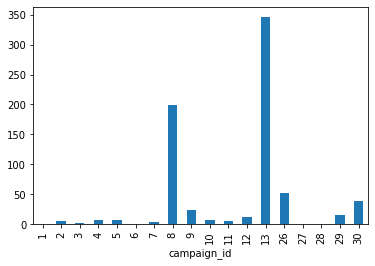

In [38]:
df.groupby(['campaign_id'])['redemption_status'].sum().plot.bar()
print("Coupon redemption in each Campaign: ")

Coupon redemption ratio each campaign: 


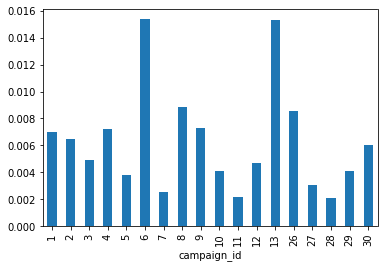

In [39]:
print("Coupon redemption ratio each campaign: ")
(df.groupby(['campaign_id'])['redemption_status'].sum()/ df.groupby(['campaign_id'])['redemption_status'].count()).plot.bar()

Coupon redemption ratio each campaign by Campaign Start Month: 


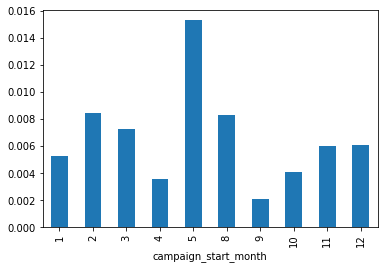

In [40]:
print("Coupon redemption ratio each campaign by Campaign Start Month: ")
(df.groupby(['campaign_start_month'])['redemption_status'].sum()/ df.groupby(['campaign_start_month'])['redemption_status'].count()).plot.bar()

Coupon redemption ratio each campaign by Campaign End Month: 


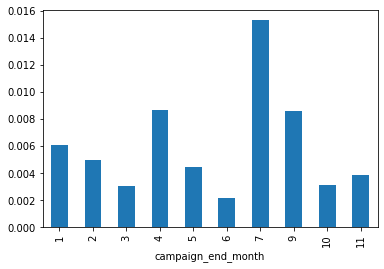

In [41]:
print("Coupon redemption ratio each campaign by Campaign End Month: ")
(df.groupby(['campaign_end_month'])['redemption_status'].sum()/ df.groupby(['campaign_end_month'])['redemption_status'].count()).plot.bar()

Coupon redemption ratio each campaign by Campaign Start Week: 


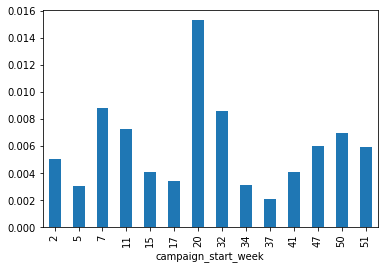

In [42]:
# Plotting the Coupon redemption against number of days.
print("Coupon redemption ratio each campaign by Campaign Start Week: ")
(df.groupby(['campaign_start_week'])['redemption_status'].sum()/ df.groupby(['campaign_start_week'])['redemption_status'].count()).plot.bar()

Coupon redemption ratio each campaign by Campaign End Week: 


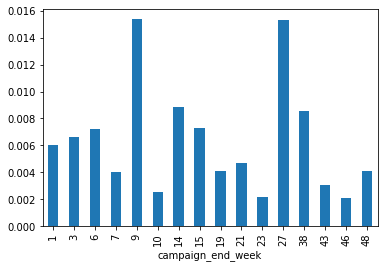

In [43]:
# Plotting the Coupon redemption against number of days.
print("Coupon redemption ratio each campaign by Campaign End Week: ")
(df.groupby(['campaign_end_week'])['redemption_status'].sum()/ df.groupby(['campaign_end_week'])['redemption_status'].count()).plot.bar()

Coupon redemption ratio each campaign by Campaign days: 


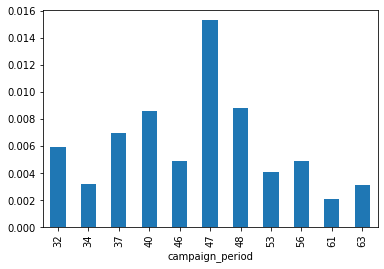

In [44]:
print("Coupon redemption ratio each campaign by Campaign days: ")
(df.groupby(['campaign_period'])['redemption_status'].sum()/ df.groupby(['campaign_period'])['redemption_status'].count()).plot.bar()

# Plotting the Coupon redemption against customer demographics feature

Coupon redemption ratio by age: 


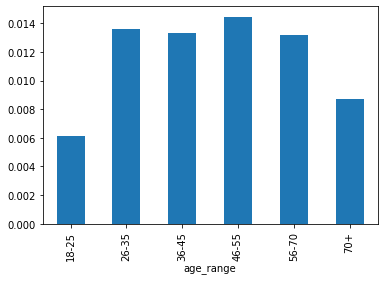

In [45]:
# Coupon redemption by age range
print("Coupon redemption ratio by age: ")
(df.groupby(['age_range'])['redemption_status'].sum()/ df.groupby(['age_range'])['redemption_status'].count()).plot.bar()

Coupon redemption ratio by Marital Status: 


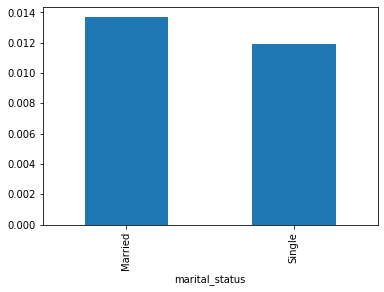

In [46]:
print("Coupon redemption ratio by Marital Status: ")
(df.groupby(['marital_status'])['redemption_status'].sum()/ df.groupby(['marital_status'])['redemption_status'].count()).plot.bar()

Coupon redemption ratio by rented: 


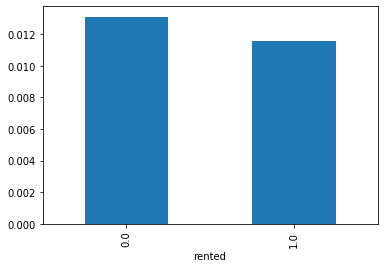

In [47]:
print("Coupon redemption ratio by rented: ")
(df.groupby(['rented'])['redemption_status'].sum()/ df.groupby(['rented'])['redemption_status'].count()).plot.bar()

Coupon redemption ratio by family_size: 


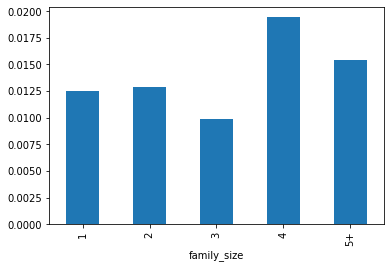

In [48]:
print("Coupon redemption ratio by family_size: ")
(df.groupby(['family_size'])['redemption_status'].sum()/ df.groupby(['family_size'])['redemption_status'].count()).plot.bar()

Coupon redemption ratio by Number of Children: 


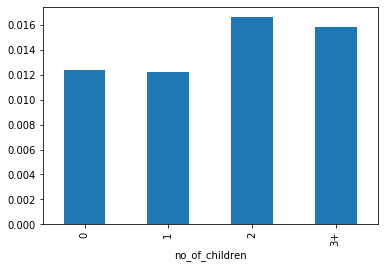

In [49]:
print("Coupon redemption ratio by Number of Children: ")
(df.groupby(['no_of_children'])['redemption_status'].sum()/ df.groupby(['no_of_children'])['redemption_status'].count()).plot.bar()

Coupon redemption ratio by income braket: 


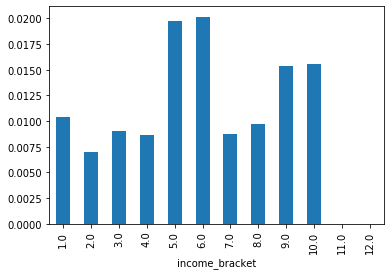

In [50]:
print("Coupon redemption ratio by income braket: ")
(df.groupby(['income_bracket'])['redemption_status'].sum()/ df.groupby(['income_bracket'])['redemption_status'].count()).plot.bar()

In [51]:
df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 200 columns):
id                                                  78369 non-null int64
campaign_id                                         78369 non-null int64
coupon_id                                           78369 non-null int64
customer_id                                         78369 non-null int64
redemption_status                                   78369 non-null int64
campaign_type                                       78369 non-null object
campaign_start_date                                 78369 non-null datetime64[ns]
campaign_end_date                                   78369 non-null datetime64[ns]
age_range                                           43661 non-null object
marital_status                                      43661 non-null object
rented                                              43661 non-null float64
family_size                                         43661 non-nu

In [52]:
df.head()
#customer_level_brand_mode, #coupon_level_brand_mode

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,campaign_start_date,campaign_end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_level_date_max,customer_level_date_min,customer_level_quantity_max,customer_level_quantity_min,customer_level_quantity_mean,customer_level_quantity_sum,customer_level_Applied_Coupon_max,customer_level_Applied_Coupon_min,customer_level_Applied_Coupon_mean,customer_level_Applied_Coupon_sum,customer_level_selling_price_mean,customer_level_selling_price_sum,customer_level_other_discount_mean,customer_level_other_discount_sum,customer_level_coupon_discount_mean,customer_level_coupon_discount_sum,customer_level_item_id_nunique,customer_level_item_id_count,customer_level_brand_nunique,customer_level_brand_mode,customer_level_brand_type_Established_max,customer_level_brand_type_Established_min,customer_level_brand_type_Established_sum,customer_level_brand_type_Established_mean,customer_level_brand_type_Local_max,customer_level_brand_type_Local_min,customer_level_brand_type_Local_sum,customer_level_brand_type_Local_mean,customer_level_category_Bakery_max,customer_level_category_Bakery_min,customer_level_category_Bakery_sum,customer_level_category_Bakery_mean,"customer_level_category_Dairy,Juices&Snacks_max","customer_level_category_Dairy,Juices&Snacks_min","customer_level_category_Dairy,Juices&Snacks_sum","customer_level_category_Dairy,Juices&Snacks_mean",customer_level_category_Flowers&Plants_max,customer_level_category_Flowers&Plants_min,customer_level_category_Flowers&Plants_sum,customer_level_category_Flowers&Plants_mean,customer_level_category_Garden_max,customer_level_category_Garden_min,customer_level_category_Garden_sum,customer_level_category_Garden_mean,customer_level_category_Grocery_max,customer_level_category_Grocery_min,customer_level_category_Grocery_sum,customer_level_category_Grocery_mean,customer_level_category_Meat_max,customer_level_category_Meat_min,customer_level_category_Meat_sum,customer_level_category_Meat_mean,customer_level_category_Miscellaneous_max,customer_level_category_Miscellaneous_min,customer_level_category_Miscellaneous_sum,customer_level_category_Miscellaneous_mean,customer_level_category_NaturalProducts_max,customer_level_category_NaturalProducts_min,customer_level_category_NaturalProducts_sum,customer_level_category_NaturalProducts_mean,customer_level_category_PackagedMeat_max,customer_level_category_PackagedMeat_min,customer_level_category_PackagedMeat_sum,customer_level_category_PackagedMeat_mean,customer_level_category_Pharmaceutical_max,customer_level_category_Pharmaceutical_min,customer_level_category_Pharmaceutical_sum,customer_level_category_Pharmaceutical_mean,customer_level_category_PreparedFood_max,customer_level_category_PreparedFood_min,customer_level_category_PreparedFood_sum,customer_level_category_PreparedFood_mean,customer_level_category_Restauarant_max,customer_level_category_Restauarant_min,customer_level_category_Restauarant_sum,customer_level_category_Restauarant_mean,customer_level_category_Salads_max,customer_level_category_Salads_min,customer_level_category_Salads_sum,customer_level_category_Salads_mean,customer_level_category_Seafood_max,customer_level_category_Seafood_min,customer_level_category_Seafood_sum,customer_level_category_Seafood_mean,customer_level_category_Skin&HairCare_max,customer_level_category_Skin&HairCare_min,customer_level_category_Skin&HairCare_sum,customer_level_category_Skin&HairCare_mean,customer_level_category_Travel_max,customer_level_category_Travel_min,customer_level_category_Travel_sum,customer_level_category_Travel_mean,customer_level_category_Vegetablescut_max,customer_level_category_Vegetablescut_min,customer_level_category_Vegetablescut_sum,customer_level_category_Vegetablescut_mean,time_since_last_visit,member_since,coupon_level_item_id_nunique,coupon_level_brand_nunique,coupon_level_brand_mode,coupon_level_brand_type_Established_max,coupon_level_brand_t

In [53]:
df['customer_level_brand_mode'] = df['customer_level_brand_mode'].astype(str)
df['coupon_level_brand_mode'] = df['coupon_level_brand_mode'].astype(str)
test['customer_level_brand_mode'] = test['customer_level_brand_mode'].astype(str)
test['coupon_level_brand_mode'] = test['coupon_level_brand_mode'].astype(str)

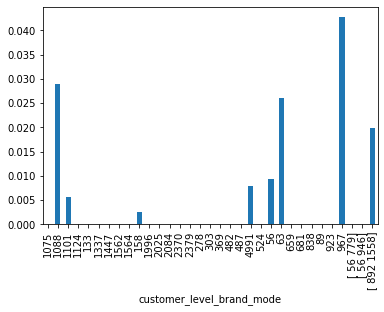

In [54]:
(df.groupby(['customer_level_brand_mode'])['redemption_status'].sum()/ df.groupby(['customer_level_brand_mode'])['redemption_status'].count()).plot.bar()

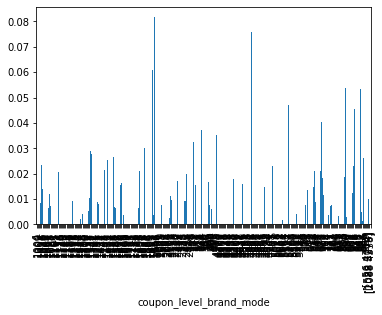

In [55]:
(df.groupby(['coupon_level_brand_mode'])['redemption_status'].sum()/ df.groupby(['coupon_level_brand_mode'])['redemption_status'].count()).plot.bar()

In [56]:
df['coupon_level_brand_mode'].value_counts()
#[1088 5278]
#[2088 4338] 
#[ 522 2074]
#[  56 4700]

56             17506
686             1824
278             1728
1134            1566
946             1430
1101            1266
487             1096
172              993
673              946
57               907
782              879
4412             854
714              785
133              762
864              744
206              661
982              656
1124             627
209              544
1337             543
507              530
1319             501
1075             498
522              495
676              471
644              457
1274             450
178              447
681              435
796              434
1996             421
1088             420
783              413
1128             404
971              403
1475             397
4409             385
2088             374
4353             372
1756             357
241              352
914              351
89               341
989              323
115              319
1342             310
890              305
1061         

In [57]:
test['coupon_level_brand_mode'].value_counts()
#[4286, 4290]
#[4325, 4326] 

56             8796
57             2181
278            1257
2088           1092
1124           1087
4341            976
686             876
209             753
782             732
1075            643
89              613
1134            552
1009            488
1335            478
458             478
487             466
826             463
2024            463
971             459
676             446
702             440
1088            423
475             415
574             410
982             404
1996            389
280             375
4302            369
1061            363
334             357
172             355
206             354
1101            336
673             319
644             317
714             316
4346            309
619             307
777             298
967             293
5057            292
1470            286
1427            276
1229            276
1262            276
147             276
984             276
119             276
158             260
1274            260


In [58]:
df['coupon_level_brand_mode'][df['coupon_level_brand_mode']=="[1088 5278]"] = "1088"
df['coupon_level_brand_mode'][df['coupon_level_brand_mode']=="[2088 4338]"] = "2088"
df['coupon_level_brand_mode'][df['coupon_level_brand_mode']=="[ 522 2074]"] = "522"
df['coupon_level_brand_mode'][df['coupon_level_brand_mode']=="[  56 4700]"] = "4700"
test['coupon_level_brand_mode'][test['coupon_level_brand_mode']=="[4286, 4290]"] = "522"
test['coupon_level_brand_mode'][test['coupon_level_brand_mode']=="[4325, 4326]"] = "4700"

In [59]:
df['customer_level_brand_mode'].value_counts()
#[ 56 946]
#[ 56 779]
#[ 892 1558]

56             75562
158              387
1337             230
1101             180
1088             173
482              164
967              164
89               161
63               153
4991             127
[ 892 1558]      101
[ 56 946]         95
2025              94
133               94
681               69
303               60
1447              52
487               52
2379              50
1124              49
1562              47
524               41
1075              33
659               27
[ 56 779]         26
838               25
278               25
923               24
1996              23
2370              23
1564              20
2084              19
369               19
Name: customer_level_brand_mode, dtype: int64

In [60]:
test['customer_level_brand_mode'].value_counts()
#[ 56 779]

56           48756
133            151
1101           135
158            130
1337           111
1088           107
482            105
1124           104
89             102
487             88
681             58
63              56
4991            48
967             45
659             25
1               24
838             22
2370            21
923             18
2025            18
278             17
1447            17
524             17
[ 56 779]       15
303             14
2379            12
544             10
Name: customer_level_brand_mode, dtype: int64

In [61]:
df['customer_level_brand_mode'][df['customer_level_brand_mode']=="[ 56 946]"] = "946"
df['customer_level_brand_mode'][df['customer_level_brand_mode']=="[ 56 779]"] = "779"
df['customer_level_brand_mode'][df['customer_level_brand_mode']=="[ 892 1558]"] = "892"
test['customer_level_brand_mode'][test['customer_level_brand_mode']=="[ 56 779]"] = "779"

In [73]:
df.shape

(78369, 200)

In [63]:
test.shape

(50226, 199)

In [64]:
df['campaign_type'] = df['campaign_type'].map({'X':0, 'Y':1})
test['campaign_type'] = test['campaign_type'].map({'X':0, 'Y':1})

df['campaign_type'].value_counts(), test['campaign_type'].value_counts()

(0    57684
 1    20685
 Name: campaign_type, dtype: int64, 0    29260
 1    20966
 Name: campaign_type, dtype: int64)

In [65]:
df['age_range'] = df['age_range'].map({"18-25":0, "70+": 5, "56-70":4, "46-55":3 , "36-45":2, "26-35":1})
test['age_range'] = test['age_range'].map({"18-25":0, "70+": 5, "56-70":4, "46-55":3 , "36-45":2, "26-35":1})
df['age_range'].value_counts(), test['age_range'].value_counts()

(3.0    15154
 2.0    11210
 1.0     8024
 4.0     3723
 5.0     3094
 0.0     2456
 Name: age_range, dtype: int64, 3.0    10777
 2.0     8425
 1.0     5804
 5.0     2221
 4.0     1935
 0.0     1777
 Name: age_range, dtype: int64)

In [66]:
df['marital_status'] = df['marital_status'].map({"Single":0,"Married":1})
test['marital_status'] = test['marital_status'].map({"Single":0,"Married":1})
test['marital_status'].value_counts()

1.0    19862
0.0    11077
Name: marital_status, dtype: int64

In [67]:
df['family_size'] = df['family_size'].map({"0":0, "1": 1, "2":2, "3":3 , "4":4, "5+":5})
test['family_size'] = test['family_size'].map({"0":0, "1": 1, "2":2, "3":3 , "4":4, "5+":5})
df['family_size'].value_counts()

2.0    16888
1.0    13612
3.0     6267
5.0     3755
4.0     3139
Name: family_size, dtype: int64

In [68]:
df['no_of_children'] = df['no_of_children'].map({"0":0, "1": 1, "2":2, "3+":3}) 
test['no_of_children'] = test['no_of_children'].map({"0":0, "1": 1, "2":2, "3+":3}) 
df['no_of_children'].value_counts()

0.0    29605
1.0     6540
3.0     3969
2.0     3547
Name: no_of_children, dtype: int64

In [69]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,campaign_start_date,campaign_end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_level_date_max,customer_level_date_min,customer_level_quantity_max,customer_level_quantity_min,customer_level_quantity_mean,customer_level_quantity_sum,customer_level_Applied_Coupon_max,customer_level_Applied_Coupon_min,customer_level_Applied_Coupon_mean,customer_level_Applied_Coupon_sum,customer_level_selling_price_mean,customer_level_selling_price_sum,customer_level_other_discount_mean,customer_level_other_discount_sum,customer_level_coupon_discount_mean,customer_level_coupon_discount_sum,customer_level_item_id_nunique,customer_level_item_id_count,customer_level_brand_nunique,customer_level_brand_mode,customer_level_brand_type_Established_max,customer_level_brand_type_Established_min,customer_level_brand_type_Established_sum,customer_level_brand_type_Established_mean,customer_level_brand_type_Local_max,customer_level_brand_type_Local_min,customer_level_brand_type_Local_sum,customer_level_brand_type_Local_mean,customer_level_category_Bakery_max,customer_level_category_Bakery_min,customer_level_category_Bakery_sum,customer_level_category_Bakery_mean,"customer_level_category_Dairy,Juices&Snacks_max","customer_level_category_Dairy,Juices&Snacks_min","customer_level_category_Dairy,Juices&Snacks_sum","customer_level_category_Dairy,Juices&Snacks_mean",customer_level_category_Flowers&Plants_max,customer_level_category_Flowers&Plants_min,customer_level_category_Flowers&Plants_sum,customer_level_category_Flowers&Plants_mean,customer_level_category_Garden_max,customer_level_category_Garden_min,customer_level_category_Garden_sum,customer_level_category_Garden_mean,customer_level_category_Grocery_max,customer_level_category_Grocery_min,customer_level_category_Grocery_sum,customer_level_category_Grocery_mean,customer_level_category_Meat_max,customer_level_category_Meat_min,customer_level_category_Meat_sum,customer_level_category_Meat_mean,customer_level_category_Miscellaneous_max,customer_level_category_Miscellaneous_min,customer_level_category_Miscellaneous_sum,customer_level_category_Miscellaneous_mean,customer_level_category_NaturalProducts_max,customer_level_category_NaturalProducts_min,customer_level_category_NaturalProducts_sum,customer_level_category_NaturalProducts_mean,customer_level_category_PackagedMeat_max,customer_level_category_PackagedMeat_min,customer_level_category_PackagedMeat_sum,customer_level_category_PackagedMeat_mean,customer_level_category_Pharmaceutical_max,customer_level_category_Pharmaceutical_min,customer_level_category_Pharmaceutical_sum,customer_level_category_Pharmaceutical_mean,customer_level_category_PreparedFood_max,customer_level_category_PreparedFood_min,customer_level_category_PreparedFood_sum,customer_level_category_PreparedFood_mean,customer_level_category_Restauarant_max,customer_level_category_Restauarant_min,customer_level_category_Restauarant_sum,customer_level_category_Restauarant_mean,customer_level_category_Salads_max,customer_level_category_Salads_min,customer_level_category_Salads_sum,customer_level_category_Salads_mean,customer_level_category_Seafood_max,customer_level_category_Seafood_min,customer_level_category_Seafood_sum,customer_level_category_Seafood_mean,customer_level_category_Skin&HairCare_max,customer_level_category_Skin&HairCare_min,customer_level_category_Skin&HairCare_sum,customer_level_category_Skin&HairCare_mean,customer_level_category_Travel_max,customer_level_category_Travel_min,customer_level_category_Travel_sum,customer_level_category_Travel_mean,customer_level_category_Vegetablescut_max,customer_level_category_Vegetablescut_min,customer_level_category_Vegetablescut_sum,customer_level_category_Vegetablescut_mean,time_since_last_visit,member_since,coupon_level_item_id_nunique,coupon_level_brand_nunique,coupon_level_brand_mode,coupon_level_brand_type_Established_max,coupon_level_brand_t

In [70]:
df.fillna(-99, inplace=True)
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,campaign_start_date,campaign_end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,customer_level_date_max,customer_level_date_min,customer_level_quantity_max,customer_level_quantity_min,customer_level_quantity_mean,customer_level_quantity_sum,customer_level_Applied_Coupon_max,customer_level_Applied_Coupon_min,customer_level_Applied_Coupon_mean,customer_level_Applied_Coupon_sum,customer_level_selling_price_mean,customer_level_selling_price_sum,customer_level_other_discount_mean,customer_level_other_discount_sum,customer_level_coupon_discount_mean,customer_level_coupon_discount_sum,customer_level_item_id_nunique,customer_level_item_id_count,customer_level_brand_nunique,customer_level_brand_mode,customer_level_brand_type_Established_max,customer_level_brand_type_Established_min,customer_level_brand_type_Established_sum,customer_level_brand_type_Established_mean,customer_level_brand_type_Local_max,customer_level_brand_type_Local_min,customer_level_brand_type_Local_sum,customer_level_brand_type_Local_mean,customer_level_category_Bakery_max,customer_level_category_Bakery_min,customer_level_category_Bakery_sum,customer_level_category_Bakery_mean,"customer_level_category_Dairy,Juices&Snacks_max","customer_level_category_Dairy,Juices&Snacks_min","customer_level_category_Dairy,Juices&Snacks_sum","customer_level_category_Dairy,Juices&Snacks_mean",customer_level_category_Flowers&Plants_max,customer_level_category_Flowers&Plants_min,customer_level_category_Flowers&Plants_sum,customer_level_category_Flowers&Plants_mean,customer_level_category_Garden_max,customer_level_category_Garden_min,customer_level_category_Garden_sum,customer_level_category_Garden_mean,customer_level_category_Grocery_max,customer_level_category_Grocery_min,customer_level_category_Grocery_sum,customer_level_category_Grocery_mean,customer_level_category_Meat_max,customer_level_category_Meat_min,customer_level_category_Meat_sum,customer_level_category_Meat_mean,customer_level_category_Miscellaneous_max,customer_level_category_Miscellaneous_min,customer_level_category_Miscellaneous_sum,customer_level_category_Miscellaneous_mean,customer_level_category_NaturalProducts_max,customer_level_category_NaturalProducts_min,customer_level_category_NaturalProducts_sum,customer_level_category_NaturalProducts_mean,customer_level_category_PackagedMeat_max,customer_level_category_PackagedMeat_min,customer_level_category_PackagedMeat_sum,customer_level_category_PackagedMeat_mean,customer_level_category_Pharmaceutical_max,customer_level_category_Pharmaceutical_min,customer_level_category_Pharmaceutical_sum,customer_level_category_Pharmaceutical_mean,customer_level_category_PreparedFood_max,customer_level_category_PreparedFood_min,customer_level_category_PreparedFood_sum,customer_level_category_PreparedFood_mean,customer_level_category_Restauarant_max,customer_level_category_Restauarant_min,customer_level_category_Restauarant_sum,customer_level_category_Restauarant_mean,customer_level_category_Salads_max,customer_level_category_Salads_min,customer_level_category_Salads_sum,customer_level_category_Salads_mean,customer_level_category_Seafood_max,customer_level_category_Seafood_min,customer_level_category_Seafood_sum,customer_level_category_Seafood_mean,customer_level_category_Skin&HairCare_max,customer_level_category_Skin&HairCare_min,customer_level_category_Skin&HairCare_sum,customer_level_category_Skin&HairCare_mean,customer_level_category_Travel_max,customer_level_category_Travel_min,customer_level_category_Travel_sum,customer_level_category_Travel_mean,customer_level_category_Vegetablescut_max,customer_level_category_Vegetablescut_min,customer_level_category_Vegetablescut_sum,customer_level_category_Vegetablescut_mean,time_since_last_visit,member_since,coupon_level_item_id_nunique,coupon_level_brand_nunique,coupon_level_brand_mode,coupon_level_brand_type_Established_max,coupon_level_brand_t

In [71]:
test.fillna(-99, inplace=True)

# Checking diffrence between train and test.

In [72]:
set(df.columns) - set(test.columns)

{'redemption_status'}

In [74]:
print("Number of Customers in Train: " + str(df['customer_id'].nunique()))
print("Number of Customers in Test: " + str(test['customer_id'].nunique()))
print("New Customers:" + str(len(set(test['customer_id'].unique()) - set(df['customer_id'].unique()))))

Number of Customers in Train: 1428
Number of Customers in Test: 1250
New Customers:154


In [75]:
print("Number of Coupons in Train: " + str(df['coupon_id'].nunique()))
print("Number of Coupons in Test: " + str(test['coupon_id'].nunique()))
print("New Coupons:" + str(len(set(test['coupon_id'].unique()) - set(df['coupon_id'].unique()))))

Number of Coupons in Train: 866
Number of Coupons in Test: 331
New Coupons:250


**Target Encoding Coupons is not a good idea because 250 of 331 coupons are new in test data**

In [76]:
#source:https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

df['coupon_brand_ratio'], test['coupon_brand_ratio'] = target_encode(trn_series=df['coupon_level_brand_mode'], tst_series=test['coupon_level_brand_mode'], target=df['redemption_status'], min_samples_leaf=10, smoothing=10, noise_level=0)
df['Customer_redemption_ratio'], test['Customer_redemption_ratio'] = target_encode(trn_series=df['customer_id'], tst_series=test['customer_id'], target=df['redemption_status'], min_samples_leaf=10, smoothing=10, noise_level=0)
df['customer_brand_ratio'], test['customer_brand_ratio'] = target_encode(trn_series=df['customer_level_brand_mode'], tst_series=test['customer_level_brand_mode'], target=df['redemption_status'], min_samples_leaf=10, smoothing=10, noise_level=0)

In [77]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
#Numerical_Columns = train.describe().columns.to_list()
Categorical_columns = ['customer_level_brand_mode', 'coupon_level_brand_mode']
df[Categorical_columns] = df[Categorical_columns].astype(str)
test[Categorical_columns] = test[Categorical_columns].astype(str)
temp = df[Categorical_columns].append(test[Categorical_columns])
temp[Categorical_columns] = temp[Categorical_columns].apply(lambda x: d[x.name].fit_transform(x))
df[Categorical_columns] = df[Categorical_columns].apply(lambda x: d[x.name].transform(x))
test[Categorical_columns] = test[Categorical_columns].apply(lambda x: d[x.name].transform(x))

**Choosing Validation campaigns data is critical here, Percentage split overfits the data very highly**

In [78]:
X = df.drop("redemption_status", axis=1)
y = df["redemption_status"]
# Split dataset into training set and test set
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # 80% training and 20% test
x_train = X[~X['campaign_id'].isin([26,27,28,29,30])]
y_train = y[~X['campaign_id'].isin([26,27,28,29,30])]
x_val = X[X['campaign_id'].isin([26,27,28,29,30])]
y_val = y[X['campaign_id'].isin([26,27,28,29,30])]
x_val.shape, y_val.shape, x_train.shape, y_train.shape

((17218, 199), (17218,), (61151, 199), (61151,))

In [79]:
X['campaign_id'].value_counts()

13    22606
8     22555
30     6467
26     6056
29     3895
9      3168
11     2782
12     2550
5      1827
10     1723
7      1584
4       972
2       768
28      476
3       408
27      324
1       143
6        65
Name: campaign_id, dtype: int64

In [80]:
x_train.shape, y_train.shape, 

((61151, 199), (61151,))

x_train['customer_brand_ratio'], x_val['customer_brand_ratio'] = target_encode(trn_series=x_train['customer_level_brand_mode'], tst_series=x_val['customer_level_brand_mode'], target=y_train, min_samples_leaf=10, smoothing=10, noise_level=0)
x_train['customer_brand_ratio'], test['customer_brand_ratio'] = target_encode(trn_series=x_train['customer_level_brand_mode'], tst_series=test['customer_level_brand_mode'], target=y_train, min_samples_leaf=10, smoothing=10, noise_level=0)

In [81]:
x_train.shape, y_train.shape, 

((61151, 199), (61151,))

x_train['coupon_brand_ratio'], x_val['coupon_brand_ratio'] = target_encode(trn_series=x_train['coupon_level_brand_mode'], tst_series=x_val['coupon_level_brand_mode'], target=y_train, min_samples_leaf=10, smoothing=10, noise_level=0)
x_train['coupon_brand_ratio'], test['coupon_brand_ratio'] = target_encode(trn_series=x_train['coupon_level_brand_mode'], tst_series=test['coupon_level_brand_mode'], target=y_train, min_samples_leaf=10, smoothing=10, noise_level=0)

In [82]:
#Customer_redemption_ratio
x_train['Customer_redemption_ratio'], x_val['Customer_redemption_ratio'] = target_encode(trn_series=x_train['customer_id'], tst_series=x_val['customer_id'], target=y_train, min_samples_leaf=10, smoothing=10, noise_level=0)
x_train['Customer_redemption_ratio'], test['Customer_redemption_ratio'] = target_encode(trn_series=x_train['customer_id'], tst_series=test['customer_id'], target=y_train, min_samples_leaf=10, smoothing=10, noise_level=0)

In [83]:
x_train.shape, y_train.shape, 

((61151, 200), (61151,))

In [84]:
x_train.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61151 entries, 0 to 78368
Data columns (total 200 columns):
id                                                  61151 non-null int64
campaign_id                                         61151 non-null int64
coupon_id                                           61151 non-null int64
customer_id                                         61151 non-null int64
campaign_type                                       61151 non-null int64
campaign_start_date                                 61151 non-null datetime64[ns]
campaign_end_date                                   61151 non-null datetime64[ns]
age_range                                           61151 non-null float64
marital_status                                      61151 non-null float64
rented                                              61151 non-null float64
family_size                                         61151 non-null float64
no_of_children                                      61151 non

In [85]:
col = [#'id',
 #'campaign_id',
 #'coupon_id',
 #'customer_id',
 'campaign_type',
 #'campaign_start_date',
 #'campaign_end_date',
 'age_range',
 #'marital_status',
 'rented',
 'family_size',
 'no_of_children',
 'income_bracket',
 #'customer_level_date_max',
 #'customer_level_date_min',
 'customer_level_quantity_max',
 'customer_level_quantity_min',
 'customer_level_quantity_mean',
 'customer_level_quantity_sum',
    #'customer_level_Applied_Coupon_max',
'customer_level_Applied_Coupon_min',
'customer_level_Applied_Coupon_mean',
'customer_level_Applied_Coupon_sum',
 'customer_level_item_id_nunique',
 'customer_level_item_id_count',
 'customer_level_brand_nunique',
 'customer_level_brand_mode',
'customer_level_selling_price_mean',
'customer_level_selling_price_sum',
'customer_level_other_discount_mean',
'customer_level_other_discount_sum',
'customer_level_coupon_discount_mean',
'customer_level_coupon_discount_sum',
 #'customer_level_brand_type_Established_max',
 'customer_level_brand_type_Established_min',
 'customer_level_brand_type_Established_sum',
 'customer_level_brand_type_Established_mean',
 #'customer_level_brand_type_Local_max',
 'customer_level_brand_type_Local_min',
 'customer_level_brand_type_Local_sum',
 'customer_level_brand_type_Local_mean',
# 'customer_level_category_Bakery_max',
 #'customer_level_category_Bakery_min',
 #'customer_level_category_Bakery_sum',
 #'customer_level_category_Bakery_mean',
 #'customer_level_category_Dairy,Juices&Snacks_max',
 #'customer_level_category_Dairy,Juices&Snacks_min',
 #'customer_level_category_Dairy,Juices&Snacks_sum',
 #'customer_level_category_Dairy,Juices&Snacks_mean',
 #'customer_level_category_Flowers&Plants_max',
 #'customer_level_category_Flowers&Plants_min',
 #'customer_level_category_Flowers&Plants_sum',
 #'customer_level_category_Flowers&Plants_mean',
 #'customer_level_category_Garden_max',
 #'customer_level_category_Garden_min',
 #'customer_level_category_Garden_sum',
 #'customer_level_category_Garden_mean',
 #'customer_level_category_Grocery_max',
 #'customer_level_category_Grocery_min',
 #'customer_level_category_Grocery_sum',
 #'customer_level_category_Grocery_mean',
 #'customer_level_category_Meat_max',
 #'customer_level_category_Meat_min',
 #'customer_level_category_Meat_sum',
 #'customer_level_category_Meat_mean',
 #'customer_level_category_Miscellaneous_max',
 #'customer_level_category_Miscellaneous_min',
 #'customer_level_category_Miscellaneous_sum',
 #'customer_level_category_Miscellaneous_mean',
 #'customer_level_category_NaturalProducts_max',
 #'customer_level_category_NaturalProducts_min',
 #'customer_level_category_NaturalProducts_sum',
 #'customer_level_category_NaturalProducts_mean',
 #'customer_level_category_PackagedMeat_max',
 #'customer_level_category_PackagedMeat_min',
 #'customer_level_category_PackagedMeat_sum',
 #'customer_level_category_PackagedMeat_mean',
 #'customer_level_category_Pharmaceutical_max',
 #'customer_level_category_Pharmaceutical_min',
 #'customer_level_category_Pharmaceutical_sum',
 #'customer_level_category_Pharmaceutical_mean',
 #'customer_level_category_PreparedFood_max',
 #'customer_level_category_PreparedFood_min',
 #'customer_level_category_PreparedFood_sum',
 #'customer_level_category_PreparedFood_mean',
 #'customer_level_category_Restauarant_max',
 #'customer_level_category_Restauarant_min',
 #'customer_level_category_Restauarant_sum',
 #'customer_level_category_Restauarant_mean',
 #'customer_level_category_Salads_max',
 #'customer_level_category_Salads_min',
 #'customer_level_category_Salads_sum',
 #'customer_level_category_Salads_mean',
 #'customer_level_category_Seafood_max',
 #'customer_level_category_Seafood_min',
 #'customer_level_category_Seafood_sum',
 #'customer_level_category_Seafood_mean',
 #'customer_level_category_Skin&HairCare_max',
 #'customer_level_category_Skin&HairCare_min',
 #'customer_level_category_Skin&HairCare_sum',
 #'customer_level_category_Skin&HairCare_mean',
 #'customer_level_category_Travel_max',
 #'customer_level_category_Travel_min',
 #'customer_level_category_Travel_sum',
 #'customer_level_category_Travel_mean',
 #'customer_level_category_Vegetablescut_max',
 #'customer_level_category_Vegetablescut_min',
 #'customer_level_category_Vegetablescut_sum',
 #'customer_level_category_Vegetablescut_mean',
 'time_since_last_visit',
 'member_since',
 'coupon_level_item_id_nunique',
 'coupon_level_brand_nunique',
 'coupon_level_brand_mode',
 'coupon_level_brand_type_Established_max',
 'coupon_level_brand_type_Established_min',
 'coupon_level_brand_type_Established_sum',
 'coupon_level_brand_type_Established_mean',
 'coupon_level_brand_type_Local_max',
 'coupon_level_brand_type_Local_min',
 'coupon_level_brand_type_Local_sum',
 'coupon_level_brand_type_Local_mean',
 #'coupon_level_category_Bakery_max',
 #'coupon_level_category_Bakery_min',
 #'coupon_level_category_Bakery_sum',
 #'coupon_level_category_Bakery_mean',
 #'coupon_level_category_Dairy,Juices & Snacks_max',
 #'coupon_level_category_Dairy,Juices & Snacks_min',
 #'coupon_level_category_Dairy,Juices & Snacks_sum',
 #'coupon_level_category_Dairy,Juices & Snacks_mean',
 #'coupon_level_category_Flowers & Plants_max',
 #'coupon_level_category_Flowers & Plants_min',
 #'coupon_level_category_Flowers & Plants_sum',
 #'coupon_level_category_Flowers & Plants_mean',
 #'coupon_level_category_Garden_max',
 #'coupon_level_category_Garden_min',
 #'coupon_level_category_Garden_sum',
 #'coupon_level_category_Garden_mean',
 #'coupon_level_category_Grocery_max',
 #'coupon_level_category_Grocery_min',
 #'coupon_level_category_Grocery_sum',
 #'coupon_level_category_Grocery_mean',
 #'coupon_level_category_Meat_max',
 #'coupon_level_category_Meat_min',
 #'coupon_level_category_Meat_sum',
 #'coupon_level_category_Meat_mean',
 #'coupon_level_category_Miscellaneous_max',
 #'coupon_level_category_Miscellaneous_min',
 #'coupon_level_category_Miscellaneous_sum',
 #'coupon_level_category_Miscellaneous_mean',
 #'coupon_level_category_NaturalProducts_max',
 #'coupon_level_category_NaturalProducts_min',
 #'coupon_level_category_NaturalProducts_sum',
 #'coupon_level_category_NaturalProducts_mean',
 #'coupon_level_category_PackagedMeat_max',
 #'coupon_level_category_PackagedMeat_min',
 #'coupon_level_category_PackagedMeat_sum',
 #'coupon_level_category_PackagedMeat_mean',
 #'coupon_level_category_Pharmaceutical_max',
 #'coupon_level_category_Pharmaceutical_min',
 #'coupon_level_category_Pharmaceutical_sum',
 #'coupon_level_category_Pharmaceutical_mean',
 #'coupon_level_category_PreparedFood_max',
 #'coupon_level_category_PreparedFood_min',
 #'coupon_level_category_PreparedFood_sum',
 #'coupon_level_category_PreparedFood_mean',
 #'coupon_level_category_Restauarant_max',
 #'coupon_level_category_Restauarant_min',
 #'coupon_level_category_Restauarant_sum',
 #'coupon_level_category_Restauarant_mean',
 #'coupon_level_category_Salads_max',
 #'coupon_level_category_Salads_min',
 #'coupon_level_category_Salads_sum',
 #'coupon_level_category_Salads_mean',
 #'coupon_level_category_Seafood_max',
 #'coupon_level_category_Seafood_min',
 #'coupon_level_category_Seafood_sum',
 #'coupon_level_category_Seafood_mean',
 #'coupon_level_category_Skin&HairCare_max',
 #'coupon_level_category_Skin&HairCare_min',
 #'coupon_level_category_Skin&HairCare_sum',
 #'coupon_level_category_Skin&HairCare_mean',
 #'coupon_level_category_Travel_max',
 #'coupon_level_category_Travel_min',
 #'coupon_level_category_Travel_sum',
 #'coupon_level_category_Travel_mean',
 #'coupon_level_category_Vegetablescut_max',
 #'coupon_level_category_Vegetablescut_min',
 #'coupon_level_category_Vegetablescut_sum',
 #'coupon_level_category_Vegetablescut_mean',
 'campaign_period',
 'campaign_start_month',
 'campaign_end_month',
 'campaign_start_day',
 'campaign_end_day',
 'campaign_start_week',
 'campaign_end_week',
 'campaign_start_dayofweek',
 'campaign_end_dayofweek',
 #'Customer_redemption_ratio',
 #'coupon_brand_ratio',
 #'customer_brand_ratio'
]

In [86]:
# SMOTE 
x_train.shape, y_train.shape

((61151, 200), (61151,))

In [87]:
columns=x_train[col].columns.to_list()
from imblearn.over_sampling import RandomOverSampler
#smt=SVMSMOTE()
smt=RandomOverSampler()
x_train, y_train = smt.fit_resample(x_train[col], y_train)
x_train=pd.DataFrame(x_train,columns=col)
y_train=pd.DataFrame(y_train,columns=['redemption_status'])

Using TensorFlow backend.


In [88]:
x_train.head()

,campaign_type,age_range,rented,family_size,no_of_children,income_bracket,customer_level_quantity_max,customer_level_quantity_min,customer_level_quantity_mean,customer_level_quantity_sum,customer_level_Applied_Coupon_min,customer_level_Applied_Coupon_mean,customer_level_Applied_Coupon_sum,customer_level_item_id_nunique,customer_level_item_id_count,customer_level_brand_nunique,customer_level_brand_mode,customer_level_selling_price_mean,customer_level_selling_price_sum,customer_level_other_discount_mean,customer_level_other_discount_sum,customer_level_coupon_discount_mean,customer_level_coupon_discount_sum,customer_level_brand_type_Established_min,customer_level_brand_type_Established_sum,customer_level_brand_type_Established_mean,customer_level_brand_type_Local_min,customer_level_brand_type_Local_sum,customer_level_brand_type_Local_mean,time_since_last_visit,member_since,coupon_level_item_id_nunique,coupon_level_brand_nunique,coupon_level_brand_mode,coupon_level_brand_type_Established_max,coupon_level_brand_type_Established_min,coupon_level_brand_type_Established_sum,coupon_level_brand_type_Established_mean,coupon_level_brand_type_Local_max,coupon_level_brand_type_Local_min,coupon_level_brand_type_Local_sum,coupon_level_brand_type_Local_mean,campaign_period,campaign_start_month,campaign_end_month,campaign_start_day,campaign_end_day,campaign_start_week,campaign_end_week,campaign_start_dayofweek,campaign_end_dayofweek
0,0.0,3.0,0.0,1.0,0.0,5.0,12444.0,1.0,340.487097,105551.0,0.0,0.003226,1.0,208.0,310.0,84.0,24.0,184.260484,57120.75,-33.168935,-10282.37,-0.287258,-89.05,0.0,166.0,0.535484,0.0,144.0,0.464516,2.0,540.0,125.0,2.0,18.0,1.0,1.0,125.0,1.0,0.0,0.0,0.0,0.0,47.0,5.0,7.0,19.0,5.0,20.0,27.0,6.0,4.0
1,0.0,2.0,0.0,2.0,0.0,3.0,11586.0,1.0,31.540260,12143.0,0.0,0.031169,12.0,244.0,385.0,102.0,24.0,234.247013,90185.10,-27.699169,-10664.18,-3.215039,-1237.79,0.0,291.0,0.755844,0.0,94.0,0.244156,20.0,486.0,3.0,1.0,278.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,47.0,5.0,7.0,19.0,5.0,20.0,27.0,6.0,4.0
2,1.0,3.0,0.0,2.0,0.0,7.0,10.0,1.0,1.392784,1351.0,0.0,0.087629,85.0,533.0,970.0,186.0,24.0,121.094495,117461.66,-17.795660,-17261.79,-2.212082,-2145.72,0.0,790.0,0.814433,0.0,180.0,0.185567,4.0,489.0,67.0,1.0,279.0,1.0,1.0,67.0,1.0,0.0,0.0,0.0,0.0,32.0,3.0,4.0,11.0,12.0,11.0,15.0,0.0,4.0
3,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,5.0,1.0,1.291139,306.0,0.0,0.008439,2.0,216.0,237.0,73.0,24.0,98.276034,23291.42,-16.655570,-3947.37,-0.751477,-178.10,0.0,126.0,0.531646,0.0,111.0,0.468354,14.0,505.0,4.0,1.0,285.0,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,47.0,5.0,7.0,19.0,5.0,20.0,27.0,6.0,4.0
4,0.0,3.0,0.0,2.0,0.0,3.0,15420.0,1.0,247.443060,139063.0,0.0,0.017794,10.0,327.0,562.0,106.0,24.0,120.636103,67797.49,-20.524733,-11534.90,-0.471548,-265.01,0.0,401.0,0.713523,0.0,161.0,0.286477,1.0,433.0,32.0,1.0,75.0,1.0,1.0,32.0,1.0,0.0,0.0,0.0,0.0,48.0,2.0,4.0,16.0,5.0,7.0,14.0,5.0,4.0


In [89]:
Categorical_columns_lgbm=[ 'campaign_type',
 #'campaign_start_date',
 #'campaign_end_date',
 'age_range',
 #'marital_status',
 'rented',
 'family_size',
 'no_of_children',
 'income_bracket']

In [90]:
len(set(test['coupon_id'].unique()) - set(df['coupon_id'].unique()))

250

In [175]:
import lightgbm
train_data = lightgbm.Dataset(x_train[col], label=y_train, categorical_feature=Categorical_columns_lgbm)
test_data = lightgbm.Dataset(x_val[col], label=y_val)

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 14,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 5,
    'learning_rate': 0.05,
    'verbose': 100,
    'lambda':100
    #'scale_pos_weight': 20
}

model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=1000)

[1]	valid_0's auc: 0.838113
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's auc: 0.846615
[3]	valid_0's auc: 0.834697
[4]	valid_0's auc: 0.846741
[5]	valid_0's auc: 0.847654
[6]	valid_0's auc: 0.854492
[7]	valid_0's auc: 0.851751
[8]	valid_0's auc: 0.850788
[9]	valid_0's auc: 0.848996
[10]	valid_0's auc: 0.851777
[11]	valid_0's auc: 0.852174
[12]	valid_0's auc: 0.853402
[13]	valid_0's auc: 0.853643
[14]	valid_0's auc: 0.853992
[15]	valid_0's auc: 0.858293
[16]	valid_0's auc: 0.858307
[17]	valid_0's auc: 0.85816
[18]	valid_0's auc: 0.857834
[19]	valid_0's auc: 0.857464
[20]	valid_0's auc: 0.857962
[21]	valid_0's auc: 0.858825
[22]	valid_0's auc: 0.859024
[23]	valid_0's auc: 0.857968
[24]	valid_0's auc: 0.857443
[25]	valid_0's auc: 0.857244
[26]	valid_0's auc: 0.856451
[27]	valid_0's auc: 0.856521
[28]	valid_0's auc: 0.856818
[29]	valid_0's auc: 0.856522
[30]	valid_0's auc: 0.856212
[31]	valid_0's auc: 0.856164
[32]	valid_0's auc: 0.855167
[33]	valid_0's auc

[285]	valid_0's auc: 0.860839
[286]	valid_0's auc: 0.860705
[287]	valid_0's auc: 0.860827
[288]	valid_0's auc: 0.860904
[289]	valid_0's auc: 0.861089
[290]	valid_0's auc: 0.861179
[291]	valid_0's auc: 0.861164
[292]	valid_0's auc: 0.861201
[293]	valid_0's auc: 0.86109
[294]	valid_0's auc: 0.860998
[295]	valid_0's auc: 0.860738
[296]	valid_0's auc: 0.860804
[297]	valid_0's auc: 0.860898
[298]	valid_0's auc: 0.860659
[299]	valid_0's auc: 0.860738
[300]	valid_0's auc: 0.860496
[301]	valid_0's auc: 0.860524
[302]	valid_0's auc: 0.860563
[303]	valid_0's auc: 0.860378
[304]	valid_0's auc: 0.860536
[305]	valid_0's auc: 0.860513
[306]	valid_0's auc: 0.860528
[307]	valid_0's auc: 0.860483
[308]	valid_0's auc: 0.860478
[309]	valid_0's auc: 0.860501
[310]	valid_0's auc: 0.860433
[311]	valid_0's auc: 0.86044
[312]	valid_0's auc: 0.860384
[313]	valid_0's auc: 0.860523
[314]	valid_0's auc: 0.860535
[315]	valid_0's auc: 0.860591
[316]	valid_0's auc: 0.860615
[317]	valid_0's auc: 0.860817
[318]	valid_

[567]	valid_0's auc: 0.857887
[568]	valid_0's auc: 0.857906
[569]	valid_0's auc: 0.857927
[570]	valid_0's auc: 0.858052
[571]	valid_0's auc: 0.857938
[572]	valid_0's auc: 0.857962
[573]	valid_0's auc: 0.858251
[574]	valid_0's auc: 0.858235
[575]	valid_0's auc: 0.858191
[576]	valid_0's auc: 0.858174
[577]	valid_0's auc: 0.858179
[578]	valid_0's auc: 0.858297
[579]	valid_0's auc: 0.858224
[580]	valid_0's auc: 0.858184
[581]	valid_0's auc: 0.857968
[582]	valid_0's auc: 0.858011
[583]	valid_0's auc: 0.857885
[584]	valid_0's auc: 0.858051
[585]	valid_0's auc: 0.858124
[586]	valid_0's auc: 0.858145
[587]	valid_0's auc: 0.858196
[588]	valid_0's auc: 0.858147
[589]	valid_0's auc: 0.858053
[590]	valid_0's auc: 0.858128
[591]	valid_0's auc: 0.858143
[592]	valid_0's auc: 0.85817
[593]	valid_0's auc: 0.858127
[594]	valid_0's auc: 0.858085
[595]	valid_0's auc: 0.858111
[596]	valid_0's auc: 0.858452
[597]	valid_0's auc: 0.858585
[598]	valid_0's auc: 0.858672
[599]	valid_0's auc: 0.85847
[600]	valid_

[849]	valid_0's auc: 0.856733
[850]	valid_0's auc: 0.856521
[851]	valid_0's auc: 0.856586
[852]	valid_0's auc: 0.856607
[853]	valid_0's auc: 0.856622
[854]	valid_0's auc: 0.856621
[855]	valid_0's auc: 0.856621
[856]	valid_0's auc: 0.856601
[857]	valid_0's auc: 0.856707
[858]	valid_0's auc: 0.856721
[859]	valid_0's auc: 0.856706
[860]	valid_0's auc: 0.856719
[861]	valid_0's auc: 0.856758
[862]	valid_0's auc: 0.856828
[863]	valid_0's auc: 0.856752
[864]	valid_0's auc: 0.856679
[865]	valid_0's auc: 0.856728
[866]	valid_0's auc: 0.856771
[867]	valid_0's auc: 0.856822
[868]	valid_0's auc: 0.856802
[869]	valid_0's auc: 0.856772
[870]	valid_0's auc: 0.856714
[871]	valid_0's auc: 0.856673
[872]	valid_0's auc: 0.856603
[873]	valid_0's auc: 0.856681
[874]	valid_0's auc: 0.856632
[875]	valid_0's auc: 0.856563
[876]	valid_0's auc: 0.85638
[877]	valid_0's auc: 0.856356
[878]	valid_0's auc: 0.856366
[879]	valid_0's auc: 0.856238
[880]	valid_0's auc: 0.856207
[881]	valid_0's auc: 0.856205
[882]	valid

[1127]	valid_0's auc: 0.855349
[1128]	valid_0's auc: 0.855425
[1129]	valid_0's auc: 0.855424
[1130]	valid_0's auc: 0.855376
[1131]	valid_0's auc: 0.855315
[1132]	valid_0's auc: 0.855233
[1133]	valid_0's auc: 0.855075
[1134]	valid_0's auc: 0.855035
[1135]	valid_0's auc: 0.854972
[1136]	valid_0's auc: 0.854982
[1137]	valid_0's auc: 0.855032
[1138]	valid_0's auc: 0.855116
[1139]	valid_0's auc: 0.855172
[1140]	valid_0's auc: 0.85518
[1141]	valid_0's auc: 0.85521
[1142]	valid_0's auc: 0.85511
[1143]	valid_0's auc: 0.855114
[1144]	valid_0's auc: 0.855196
[1145]	valid_0's auc: 0.855289
[1146]	valid_0's auc: 0.855328
[1147]	valid_0's auc: 0.85543
[1148]	valid_0's auc: 0.855499
[1149]	valid_0's auc: 0.855638
[1150]	valid_0's auc: 0.85574
[1151]	valid_0's auc: 0.855804
[1152]	valid_0's auc: 0.855774
[1153]	valid_0's auc: 0.855811
[1154]	valid_0's auc: 0.855844
[1155]	valid_0's auc: 0.855834
Early stopping, best iteration is:
[155]	valid_0's auc: 0.863022


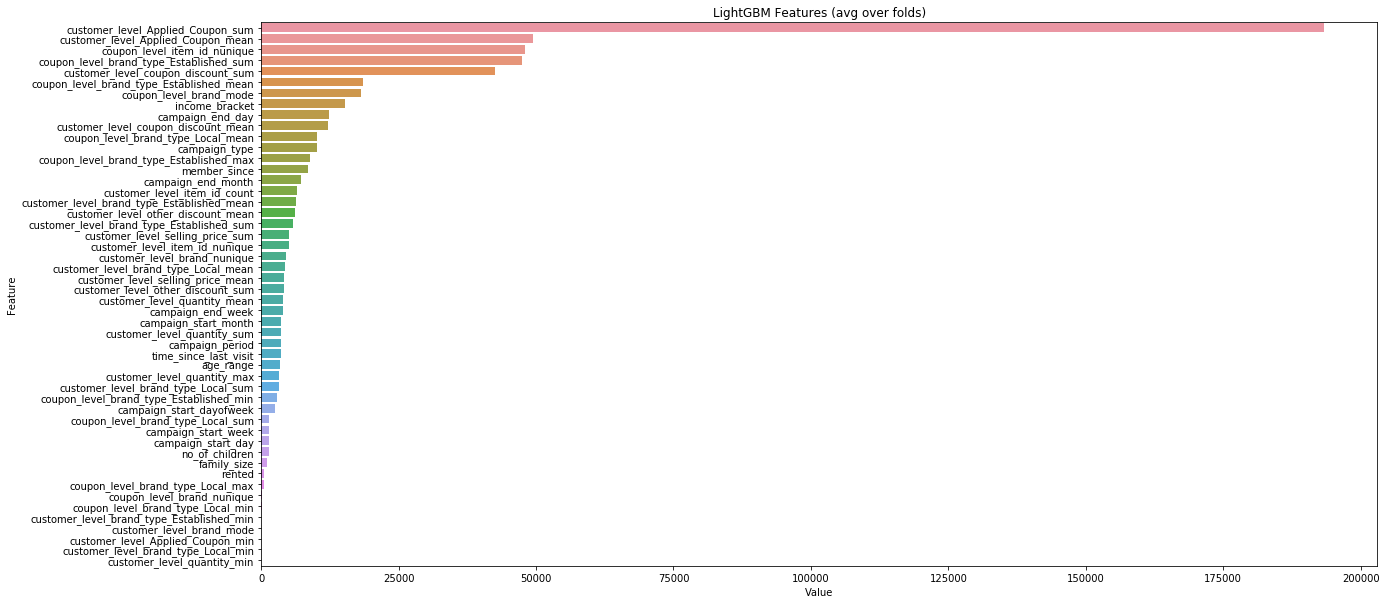

<Figure size 432x288 with 0 Axes>

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 100):
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(importance_type='gain'),X.columns)), 
                               columns=['Value','Feature'])
    plt.figure(figsize=(20, 10))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.show()
    plt.savefig('lgbm_importances-01.png')

plotImp(model, x_train[col] , num = 50)

In [177]:
y_pred = model.predict(test[col])

In [178]:
sub = pd.read_csv("sample_submission_Byiv0dS.csv")

In [179]:
sub.head()

,id,redemption_status
0,3,0
1,4,0
2,5,0
3,8,0
4,10,0


In [180]:
sub['redemption_status'] = y_pred

In [181]:
sub.to_csv("lgbm_Submission.csv", index=False)